<a href="https://colab.research.google.com/github/FMabiala/data-science.github.io/blob/main/Project_Power_Prediction_LSTM_%26_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A Deep Learning Project** - *Long-Short Term Memory Recurrent Neural Networks Model*
##*11/05/2024*

#Forecasting timeseries with #machinelearning models 📈

This comprehensive guide provides a deep dive into #forecasting with machine learning, with a focus on #Python, #Pytorch and the versatile  library.

🔗 https://lnkd.in/dWGy8V4b

🔗 https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

🔗 https://lnkd.in/eDMytRKS

Explore the world of #timeseries with us and learn how to make accurate predictions using some of the most advanced machine learning algorithms such as #LSTM, #RandomForest, #XGBoost and many others.

👤 Floyd L Mabiala

Check out the new updates 𝘍𝘰𝘳𝘦𝘤𝘢𝘴𝘵𝘪𝘯𝘨 𝘸𝘪𝘵𝘩 𝘔𝘢𝘤𝘩𝘪𝘯𝘦 𝘓𝘦𝘢𝘳𝘯𝘪𝘯𝘨 𝘔𝘰𝘥𝘦𝘭𝘴 by Floyd Mabiala https://github.com/FMabiala/data-science.github.io

#DataScience #Forecasting #Python #skforecast #TimeSeriesAnalysis #machinelearning

#**Wind turbine power output prediction using LSTM RNN, and Random Forest models**
#*by Floyd L. Mabiala*

## **Summary of the project**

*  I have managed to implement the RNN-LSTM model and compare them to
Random Forest.

*  I used two different approaches: in the first part, Active Power is used as the only Input, and in second part, Wind Speed is used as Input and Active Power as a Target. The models work well, and the performance metrics are also evaluated.

*  I learn and get to understand how the model works and how the batch size, sequence length and input size can affect the model performance. Changing the Number of hidden dimensions and Number of iterations can also significantly affect the results.

*  Model like XGBoost would be investigated in the future for comparison.



#1. Methods, Experimentation designs and Performance
##1.1. Methods:
Here, we proposed a LSTM-RNN and Random Forest methods for accurate wind power forecasting. The input features used in our
modelling are current wind speed, and current Active power output.

##1.2 Experimentation designs
In the first step of the forecasting power output of the wind
turbine, we proposed two LSTM recurrent RNN models and Random Forest with same inputs and the same output. The main aim of this project is to compare
forecasting models and see the impact of the features,
(wind speed and the active generated power) on
the predicting accuracy of the power output one day
ahead or sequence length.
The project is divided in two parts:
1. Part 1: The only Input used is the Active Power
2. Part 2: The Inputs used
- X inputs = the Wind Speed and
- Y target = the Active Power.

## 1.3. Performance comparison of the proposed methods

To evaluate the performance of the models, data is randomly categorised into three training (80%), testing (20%) sets, the LSTM deep network is used.

To compare the performance of the applied forecasting models, four broad performance indices are used: the mean square error (MSE), the root mean square error (RMSE), Mean Absolute Percentage Error (MAPE) and the Pearson correlation coefficient (R).



## Import necessary packages

In [ ]:
# Import necessary packages
import numpy as np
import torch
from torch import nn
from sklearn.preprocessing import MinMaxScaler
import helper
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from datetime import datetime
import xgboost as xgb
import missingno as msno

#2. Load the DataSet, Visualize and Clean the Data
## Task 1: Load & Explore the Data and Analyse (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Load the data
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks - ML/DataSet- ML work/Turbine_Data.csv')
data_frame.tail()

Unnamed: 0  ActivePower  AmbientTemperatue  \
118219  2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220  2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221  2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222  2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223  2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
118219          1.950088                    0.0                  59.821165   
118220          2.136732                    0.0                  59.142038   
118221          2.139664                    0.0                  58.439439   
118222          2.009781                    0.0                  58.205413   
118223          1.933124                    0.0                  58.581716   

        GearboxOilTemperature  ...  GeneratorWinding2Temperature  \
118219              55.193793  ...                     58.148777   
118220              54.798545  ...                     57.550367   
118221              54.380456  ...                     57.099335   
118222              54.079014  ...                     56.847239   
118223              54.080505  ...                     56.741040   

        HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
118219       39.008931           36.476562            178.0      13.775785   
118220       39.006759           36.328125            178.0       8.088928   
118221       39.003815           36.131944            178.0       4.355978   
118222       39.003815           36.007805            190.0      12.018077   
118223       39.003815           35.914062            203.0      14.439669   

        RotorRPM  TurbineStatus  WTG  WindDirection WindSpeed  
118219  9.234004            2.0  G01          178.0  3.533445  
118220  9.229370            2.0  G01          178.0  3.261231  
118221  9.236802            2.0  G01          178.0  3.331839  
118222  9.237374            2.0  G01          190.0  3.284468  
118223  9.235532            2.0  G01          203.0  3.475205  

[5 rows x 22 columns]

As we can see the "unnamed:0" feature is the timestamp and there is also a numerical indexing. We are going to discard the timesetamp feature and import it as a datetime for better indexing

In [ ]:
# By viewing the csv the column Unnamed:0 is the date column ...
#   ... so it is better to import it as such and then set it as a datetime
## Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks - ML/DataSet- ML work/Turbine_Data.csv',
                 parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])

In [ ]:
## Change Data type to datetime
df.index = pd.to_datetime(df.index)
df.head()

ActivePower  AmbientTemperatue  \
2017-12-31 00:00:00+00:00          NaN                NaN   
2017-12-31 00:10:00+00:00          NaN                NaN   
2017-12-31 00:20:00+00:00          NaN                NaN   
2017-12-31 00:30:00+00:00          NaN                NaN   
2017-12-31 00:40:00+00:00          NaN                NaN   

                           BearingShaftTemperature  Blade1PitchAngle  \
2017-12-31 00:00:00+00:00                      NaN               NaN   
2017-12-31 00:10:00+00:00                      NaN               NaN   
2017-12-31 00:20:00+00:00                      NaN               NaN   
2017-12-31 00:30:00+00:00                      NaN               NaN   
2017-12-31 00:40:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
2017-12-31 00:00:00+00:00               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2017-12-31 00:10:00+00:00                    NaN           NaN  ...   
2017-12-31 00:20:00+00:00                    NaN           NaN  ...   
2017-12-31 00:30:00+00:00                    NaN           NaN  ...   
2017-12-31 00:40:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
2017-12-31 00:00:00+00:00                           NaN             NaN   
2017-12-31 00:10:00+00:00                           NaN             NaN   
2017-12-31 00:20:00+00:00                           NaN             NaN   
2017-12-31 00:30:00+00:00                           NaN             NaN   
2017-12-31 00:40:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:10:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:20:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:30:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:40:00+00:00                 NaN              NaN            NaN   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:10:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:20:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:30:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:40:00+00:00       NaN            NaN  G01           NaN   

                           WindSpeed  
2017-12-31 00:00:00+00:00        NaN  
2017-12-31 00:10:00+00:00        NaN  
2017-12-31 00:20:00+00:00        NaN  
2017-12-31 00:30:00+00:00        NaN  
2017-12-31 00:40:00+00:00        NaN  

[5 rows x 21 columns]

The "unnamed:0" feature column is no more, and Now we can seee the indexing has cahnged from numeral to datetime and the dataset is imported as such.

# 2.1 Exploratory Data Analysis (EDA)

In [ ]:
# i ) Get the data information
print('Info of the DataSet')
print('--------------------------------------------------------')
df.info()
print('######################################################\n')
print('\nMissing values the DataSet')
print('--------------------------------------------------------')
df.isna().sum()

Info of the DataSet
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-n

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

##*Observation 1:*

- We have 118224 entries, and a total 21 columns or feature.
The feature and their data type along with Non-null Counts.
The Data type has changed to a datetime (yy-mm-dd and hh:mm:ss), starting from 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00

- There is a lot of missing data, for example Active Power has about 23474 missing values.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

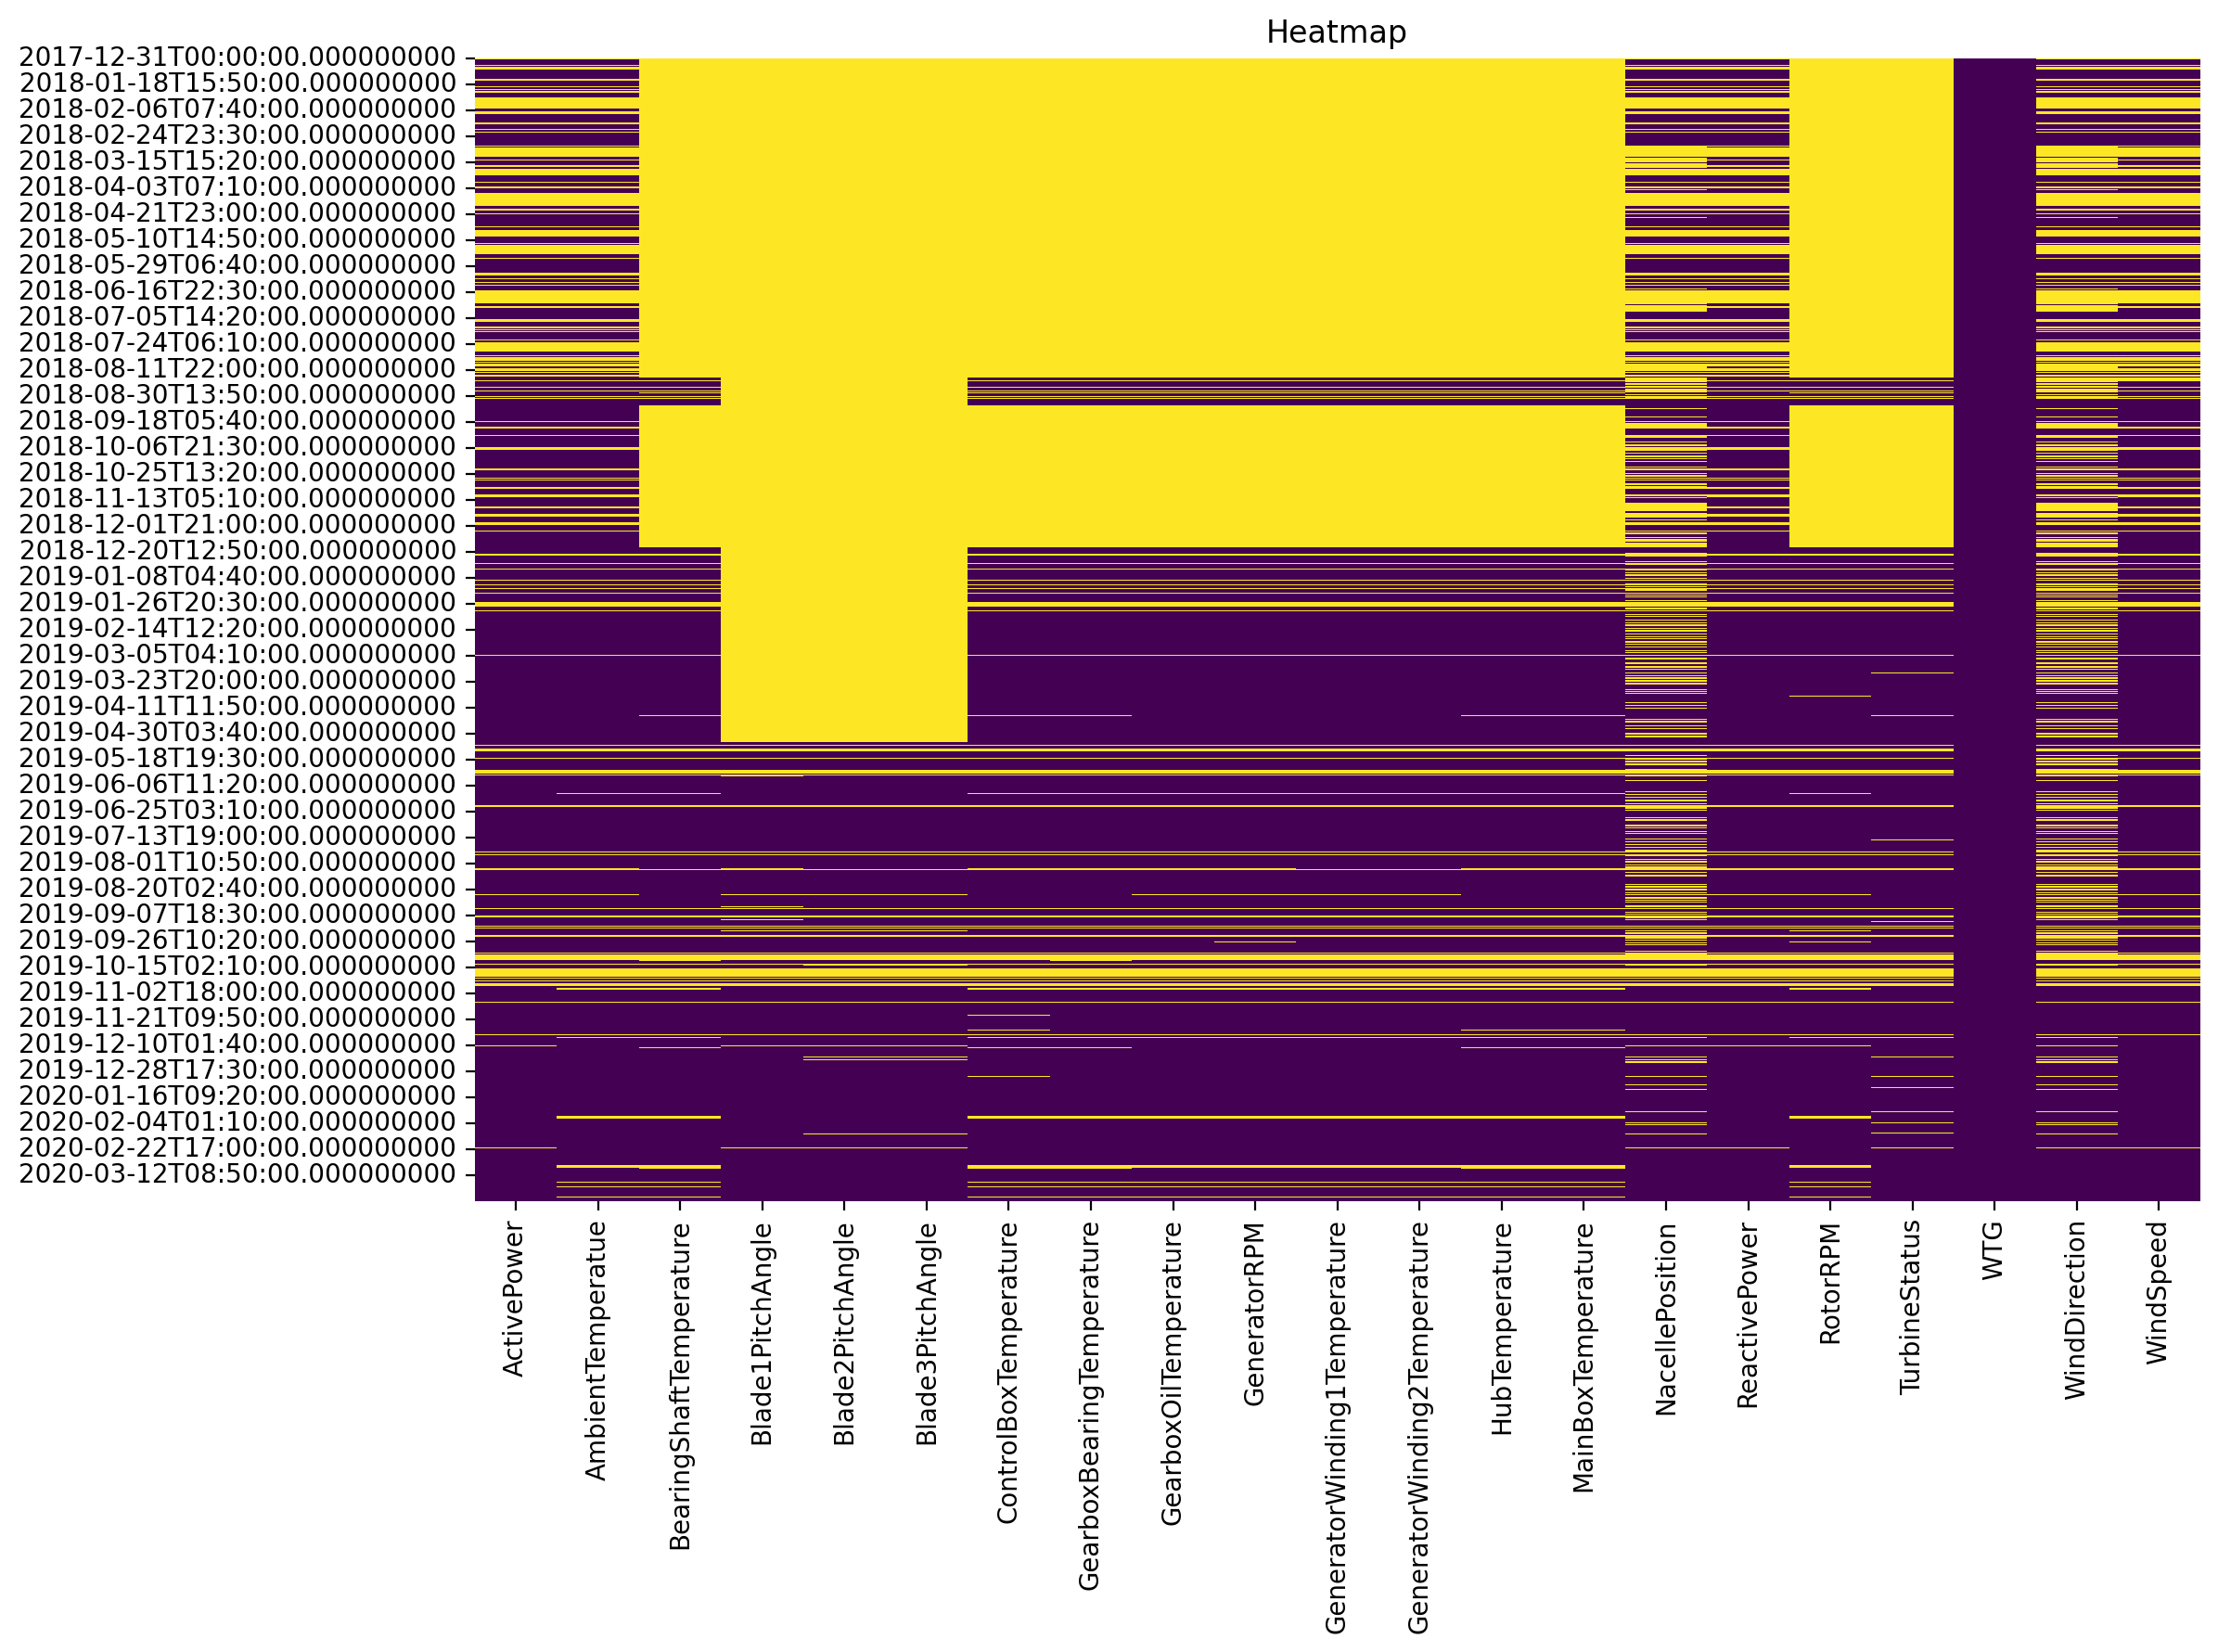

In [ ]:
# 1. Visualizing the missing values
## Checking the missing values using Heatmap or Matrix
Heatmap = plt.figure()  # Name of the pitcture

plt.figure(figsize =(12, 8))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis')
plt.title('Heatmap')
#***********************
plt.savefig('Heatmap.png')  # Saving the image
files.download('Heatmap.png')  # downloading the picture
#**********************
plt.show()

## Obesrvation :
Using Heatmap, it shows where values are missing.


## 2.2. Clean the Data

In [ ]:
# 3. Duplicated values
duplicate_inputs = df.duplicated().sum()
print("Duplicated values")
print('--------------------------------------------')
display(duplicate_inputs)
print('#############################################')
## Checking unique values
unique_values = df.nunique()
print('Unique values')
print('--------------------------------------------')
display(unique_values)
# 4. Drop Duplicated & missing values
# duplicate_inputs = df.duplicated().sum()

Duplicated values
--------------------------------------------


23047

#############################################
Unique values
--------------------------------------------


ActivePower                     94078
AmbientTemperatue               93669
BearingShaftTemperature         62282
Blade1PitchAngle                38796
Blade2PitchAngle                38896
Blade3PitchAngle                38896
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62410
GeneratorRPM                    60989
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62422
HubTemperature                  37969
MainBoxTemperature              49143
NacellePosition                  6664
ReactivePower                   94039
RotorRPM                        59229
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94206
dtype: int64

##*Observation:*
The process of cleaning and unifying messy and complex data sets for easy access and analysis.
- Since there are many missing values, We can't drop them, as their important for our analysis.
- Filling all of this missing data might lead to a biased prediction "Garbage in, garbage out".
Maybe we should cut out a good portion and only use where we have most of the Observation (Data).
- As we can see we also have a lots of duplicated values about 23129 out of 118224 entries.
- About 23474 and 23629 NaN values for Active power and WindSpeed, respectively. Again we connot drop all the NaN, because we are not sure exactly of the data type


In [ ]:
## Since the Power output is our target, let's:
# Checking negative Power and where Power == 0
# suppression of aberrant values
cols = ['ActivePower', 'WindSpeed']
df[cols][df['ActivePower']<0], df[cols][df['ActivePower']==0]

(                           ActivePower  WindSpeed
 2018-01-01 00:00:00+00:00    -5.357727   2.279088
 2018-01-01 00:10:00+00:00    -5.822360   2.339343
 2018-01-01 00:20:00+00:00    -5.279409   2.455610
 2018-01-01 00:30:00+00:00    -4.648054   2.026754
 2018-01-01 00:40:00+00:00    -4.684632   1.831420
 ...                                ...        ...
 2020-03-30 03:50:00+00:00    -7.005695   2.505505
 2020-03-30 04:00:00+00:00    -5.576951   2.174616
 2020-03-30 04:10:00+00:00    -4.945515   2.333189
 2020-03-30 04:20:00+00:00    -6.565684   2.946595
 2020-03-30 04:40:00+00:00    -9.814717   3.425716
 
 [15644 rows x 2 columns],
                            ActivePower  WindSpeed
 2018-02-06 04:50:00+00:00          0.0   1.946512
 2018-02-06 05:00:00+00:00          0.0   2.298387
 2018-02-06 05:10:00+00:00          0.0   2.272900
 2018-02-06 05:30:00+00:00          0.0   2.590335
 2018-02-06 05:40:00+00:00          0.0   2.832323
 ...                                ...        ...
 2

In [ ]:
# ## Let's drop duplicated values
# df.drop_duplicates(inplace=True)
# len(df_update)

#  Checking the total NaN of Active Power
total_na = df['ActivePower'].isna().sum()
total = df['ActivePower'].count()

print('Percentage of NaN values {} %'.format(round(total_na/ total, 2) *100))

Percentage of NaN values 25.0 %


## Observation
Many of the power values are negative and/or zero, which is a bit inconsistant, as we cannot have a negative active power generation, there must certainly be an issue in the collection of the data.
## Observation
We wanted to see the percentage of the minssing of the target feature which is the Power Output. Since the percentage of NaN is only 1.0 %, we can do with, lest mess up our data, if we drop them

In [ ]:
## Important feature we have
df.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG',
       'WindDirection', 'WindSpeed'],
      dtype='object')

To avaid confusion it is important to reduce the number of features, and focus only to what matters to us.

The wind energy system is mostly dependent on a few variables chosen including wind speed, wind direction, ambient temperature, Nacelle temperature, Hydraulic oil temperature and Hydraulic
oil pressure.
But mainly on the Wind Speed, therefore, we are going to focus on the Weed Speed

In [ ]:
# ## Drop Un-necessary Columns
if (df['Blade3PitchAngle'].equals(df['Blade2PitchAngle']) == True):
  ## Check if Blade3PitchAngle==Blade2PitchAngle
  print('They are the same, then Un-necessary Columns dropped')
else:
  print('Blade3PitchAngle is Not the same as 2')

df_update = df.drop(['BearingShaftTemperature','Blade3PitchAngle','NacellePosition',
                    'ControlBoxTemperature','GearboxBearingTemperature',
                    'GeneratorWinding1Temperature','GeneratorWinding2Temperature',
                    'HubTemperature','MainBoxTemperature', 'ReactivePower',
                    'TurbineStatus', 'WTG', "WindDirection", 'AmbientTemperatue'], axis=1)
print('Updated dataframe with a few usefull features')
print('----------------------------------------------------\n')
df_update.tail()

They are the same, then Un-necessary Columns dropped
Updated dataframe with a few usefull features
----------------------------------------------------



ActivePower  Blade1PitchAngle  Blade2PitchAngle  \
2020-03-30 23:10:00+00:00    70.044465          1.515669          1.950088   
2020-03-30 23:20:00+00:00    40.833474          1.702809          2.136732   
2020-03-30 23:30:00+00:00    20.777790          1.706214          2.139664   
2020-03-30 23:40:00+00:00    62.091039          1.575352          2.009781   
2020-03-30 23:50:00+00:00    68.664425          1.499323          1.933124   

                           GearboxOilTemperature  GeneratorRPM  RotorRPM  \
2020-03-30 23:10:00+00:00              55.193793   1029.870744  9.234004   
2020-03-30 23:20:00+00:00              54.798545   1030.160478  9.229370   
2020-03-30 23:30:00+00:00              54.380456   1030.137822  9.236802   
2020-03-30 23:40:00+00:00              54.079014   1030.178178  9.237374   
2020-03-30 23:50:00+00:00              54.080505   1029.834789  9.235532   

                           WindSpeed  
2020-03-30 23:10:00+00:00   3.533445  
2020-03-30 23:20:00+00:00   3.261231  
2020-03-30 23:30:00+00:00   3.331839  
2020-03-30 23:40:00+00:00   3.284468  
2020-03-30 23:50:00+00:00   3.475205

## Observation
We can see the updated dataframe with a few usefull features for the modelling.

### The correlation with the power features

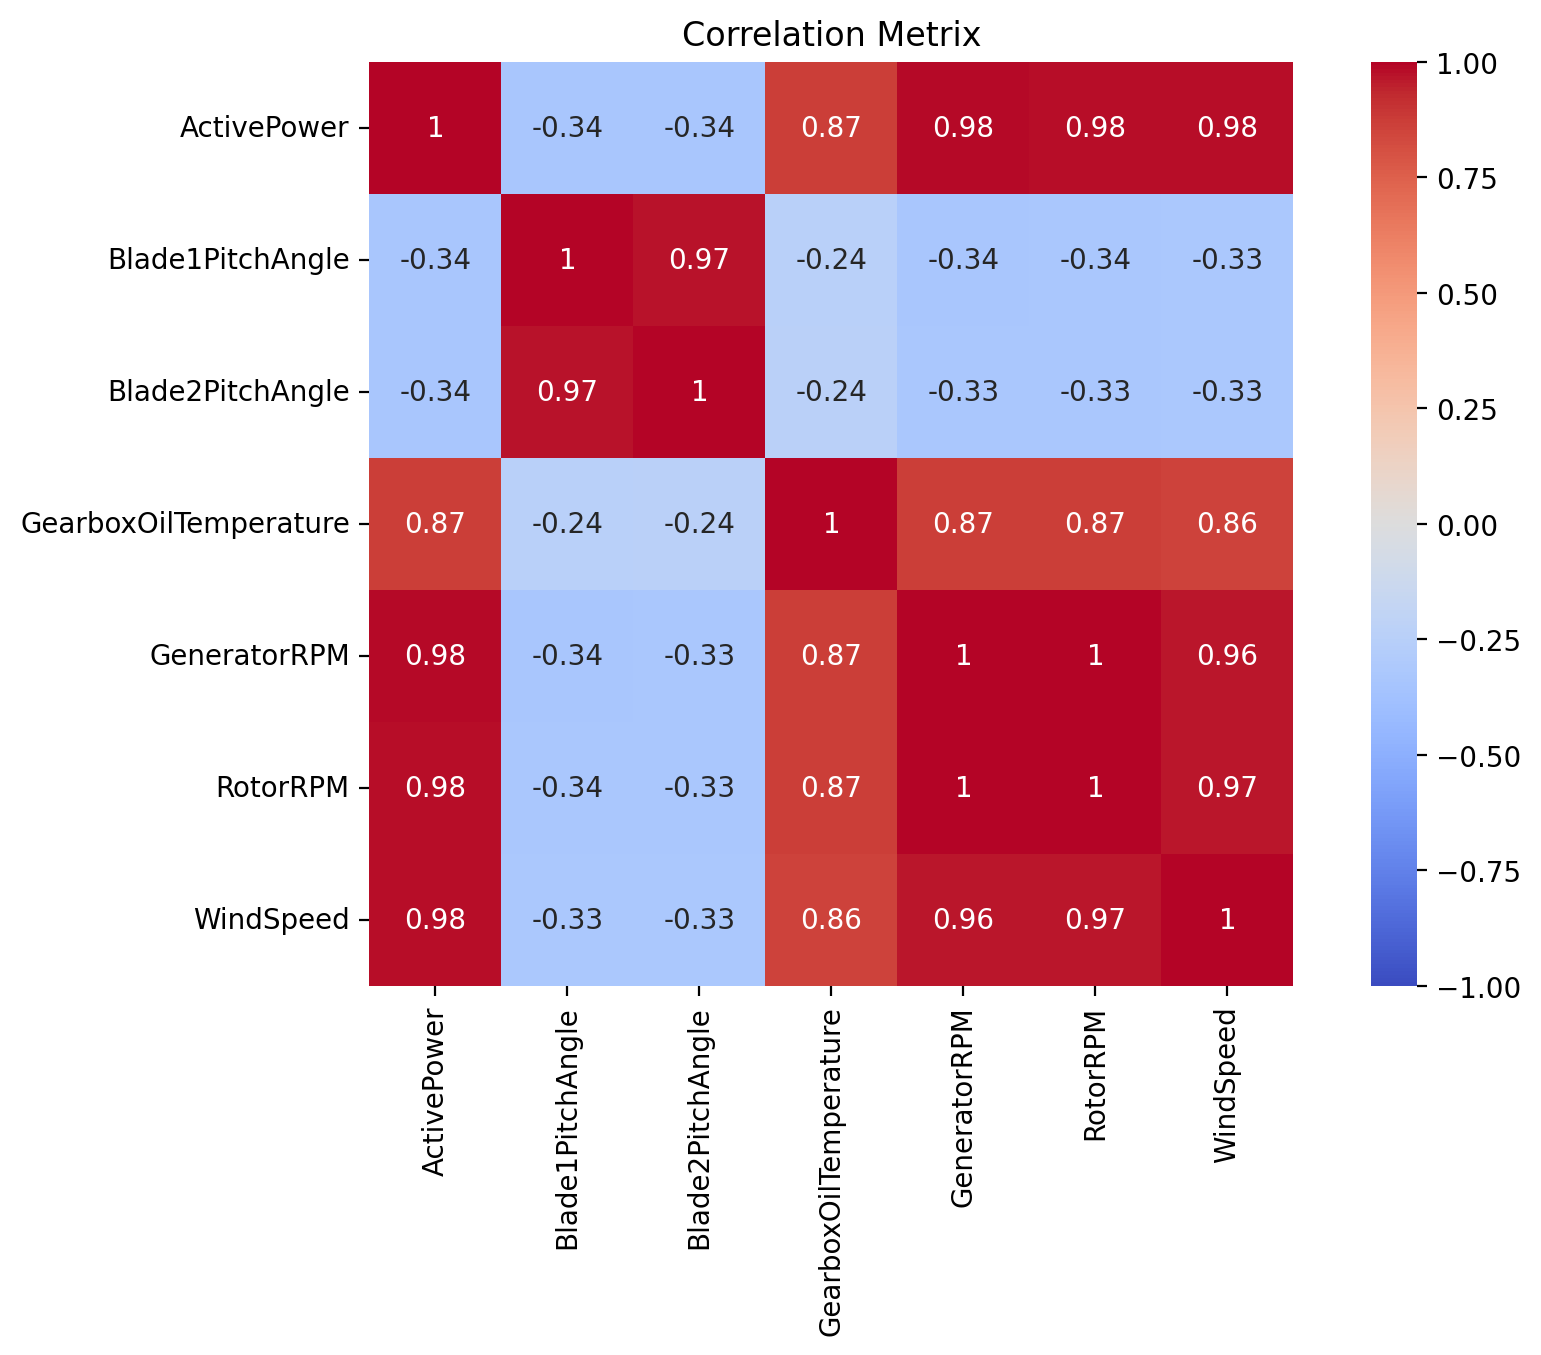

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
## Heat map to see the Correlation between the features

# The correlation with the power features
# Correlation between the features

plt.figure(figsize =(10, 6) )
sns.heatmap(df_update.corr('spearman'), square=True, vmin =-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Metrix')
#***********************
# Correlation = plt.figure()  # Name of the pitcture
# Correlation.savefig('Correlation.png')  # Saving the image
# files.download('Correlation mode.png')  # downloading the picture
#**********************
plt.show()

## Observation:
With the new dataframe, We play with the heatmap to see the Correlation between the different features and the power output

As we can see there is a strong **Correlation**  between 'ActivePower',and
GearboxOilTemperature, GeneratorRPM, RotorRPM, WindSpeed. However, the Blade1PitchAngles do not correlate with the Active power because of the negative values.

## Plot the correlated features with the Active Power

<ipython-input-112-0005ec176e35>:17: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


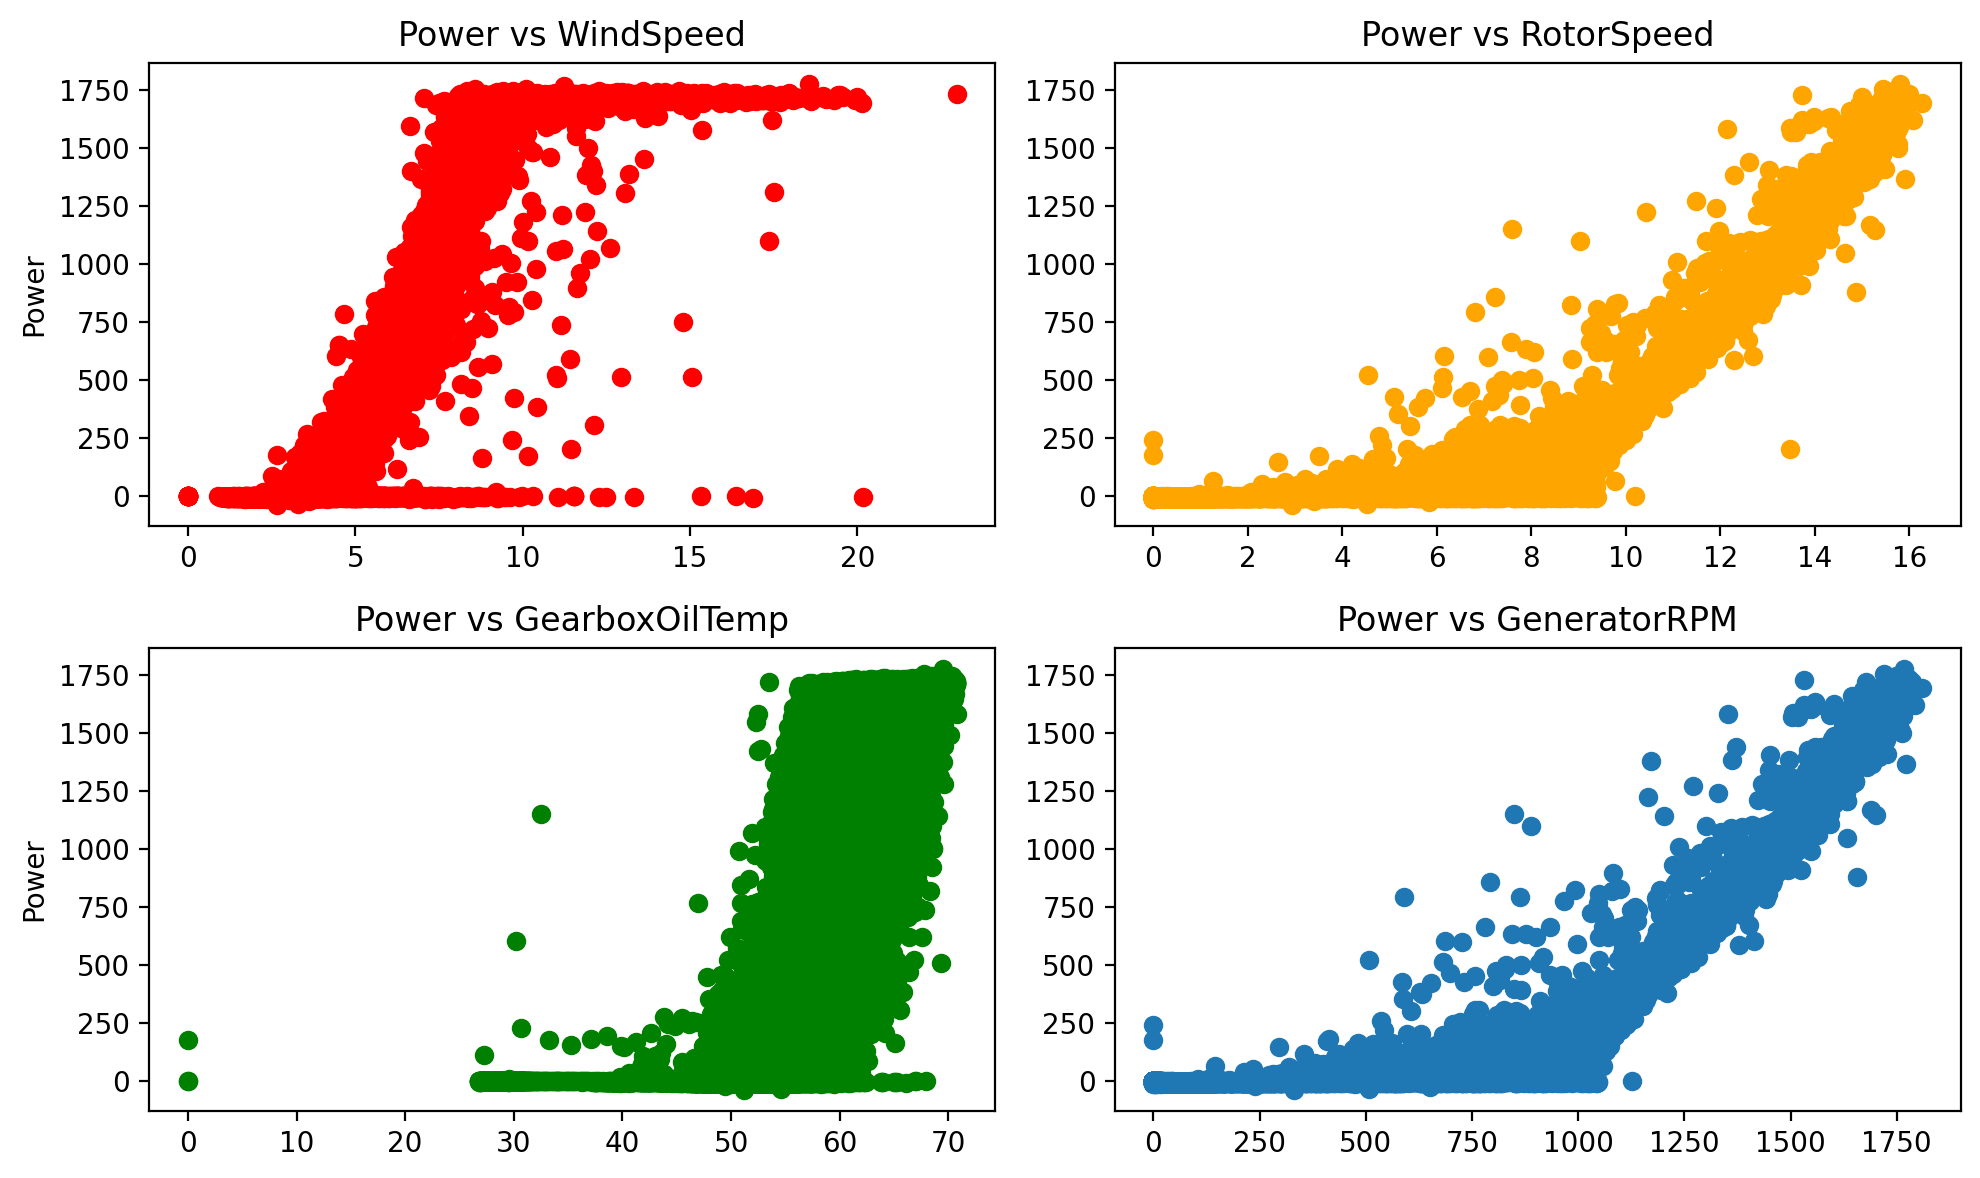

In [ ]:
## Plot *Power vs WindSpeed*, *Power vs RotorSpeed (RPM)*, *Power vs GearboxOilTemperature*,
# and *Power vs GeneratorRPM*
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                             figsize=(10, 6), layout='constrained',
                        sharex=False, sharey=False)
# fig.subplots_adjust(left=0.2, wspace=0.4)
ax1.scatter(df_update['WindSpeed'], df_update['ActivePower'], alpha = 1, color='red')
ax1.set_ylabel('Power', bbox=None)
ax1.set_title("Power vs WindSpeed")
ax2.scatter(df_update['RotorRPM'], df_update['ActivePower'], alpha = 1, color='orange')
ax2.set_title("Power vs RotorSpeed")
ax3.scatter(df_update['GearboxOilTemperature'], df_update['ActivePower'], alpha = 1, color='green')
ax3.set_ylabel('Power', bbox=None)
ax3.set_title("Power vs GearboxOilTemp")
ax4.scatter(df_update['GeneratorRPM'], df_update['ActivePower'], alpha = 1)
ax4.set_title("Power vs GeneratorRPM")
fig.tight_layout()
plt.show()

- *Power vs WindSpeed*: Power is not generated until 2.5 m/s of WindSpeed, and it plateaus at around 8.0 m/s.

- *Power vs RotorSpeed*, Power is generated around 9 rad/s of the rotational Speed.

- *Power vs GearboxOilTemperature* We can GearboxOilTemperature showing the operational Oil temperature between 50-65 degree Celcius.

- *Power vs GeneratorRPM (RPM)* Power is generated around 900 RPM of the generator Speed.

These plot confirmed again the correlation with the Active power. It also confirmed the Active power is proportional to both the  wind speed and rotor speed.
Therefore, we can choose to work with one parameter wind speed or rotor speed

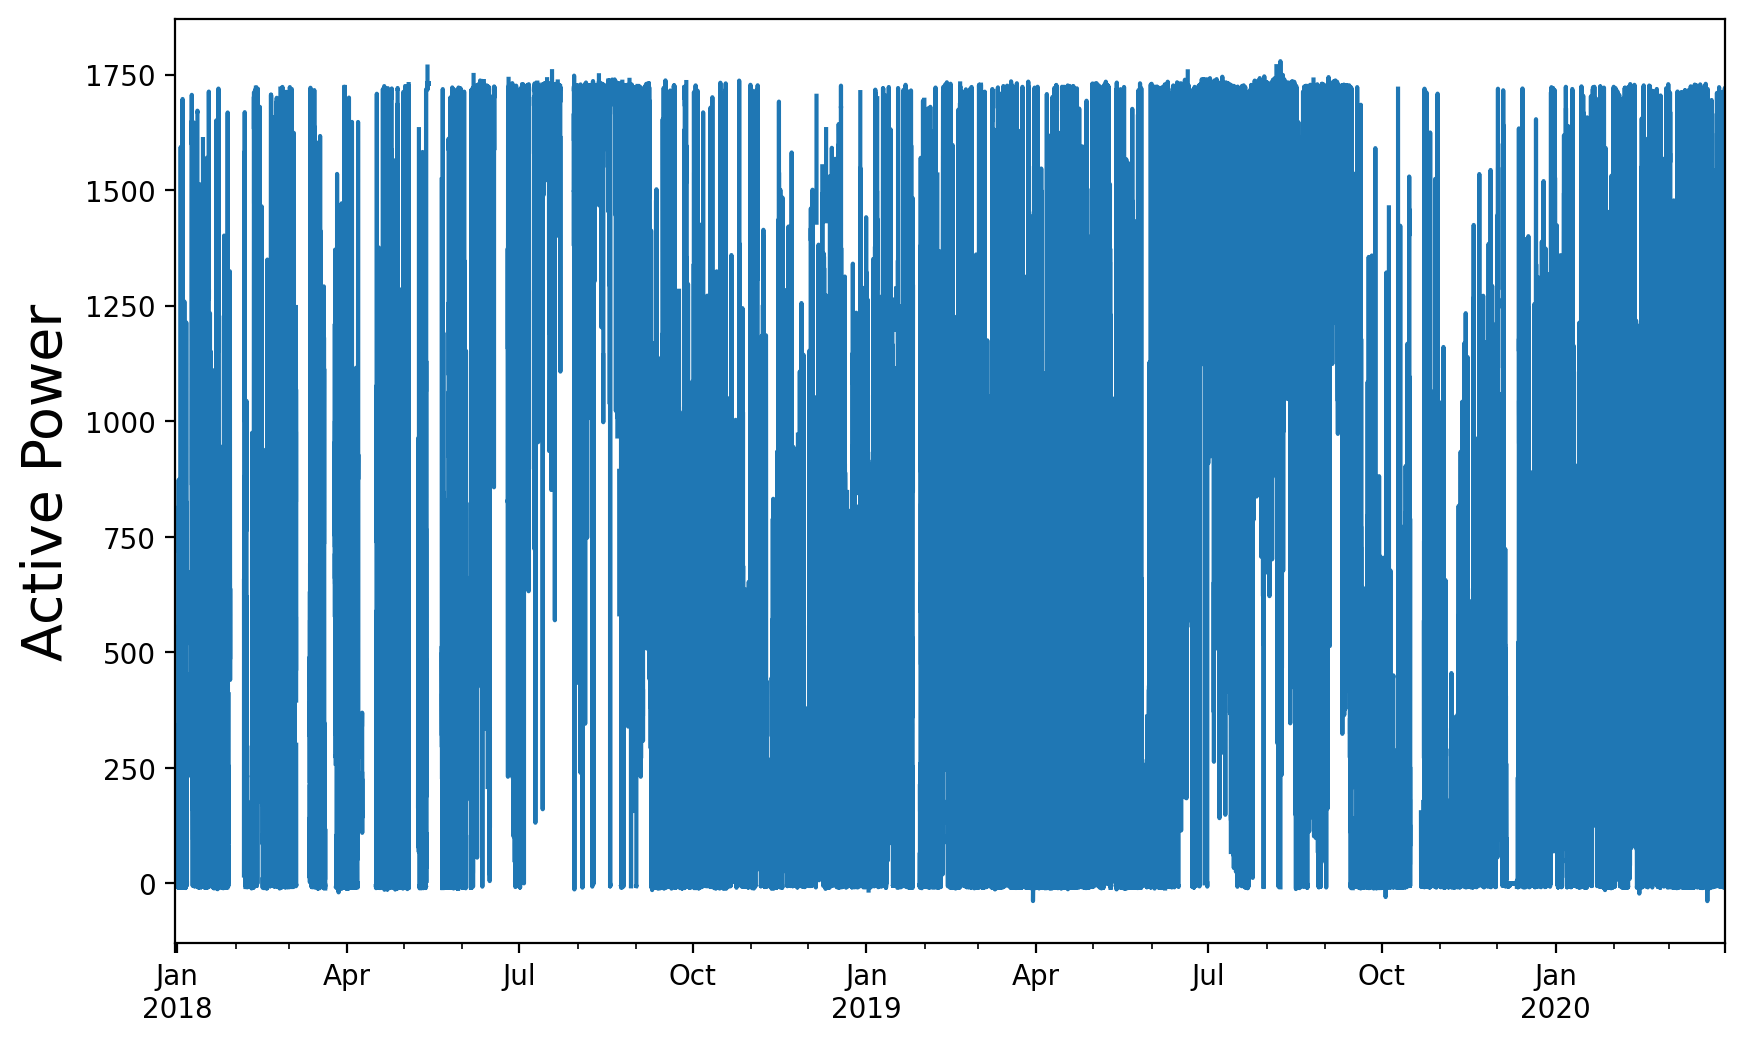

In [ ]:
# Plot Active Power over time
plt.figure(figsize=(10,6))
df_update['ActivePower'].plot()
plt.ylabel('Active Power', fontsize = 20)
plt.show()

 The Active power in this scale looks is a bit messy.
 Here, there is a reading every 10 minutes.

 Therefore, let us change it in a proper sclale: Daily time step

 ---


<ipython-input-26-b848dbea0579>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_update['ActivePower'].resample('M').mean().plot(color = 'red', label = 'Monthly', linestyle='-.', linewidth='3')


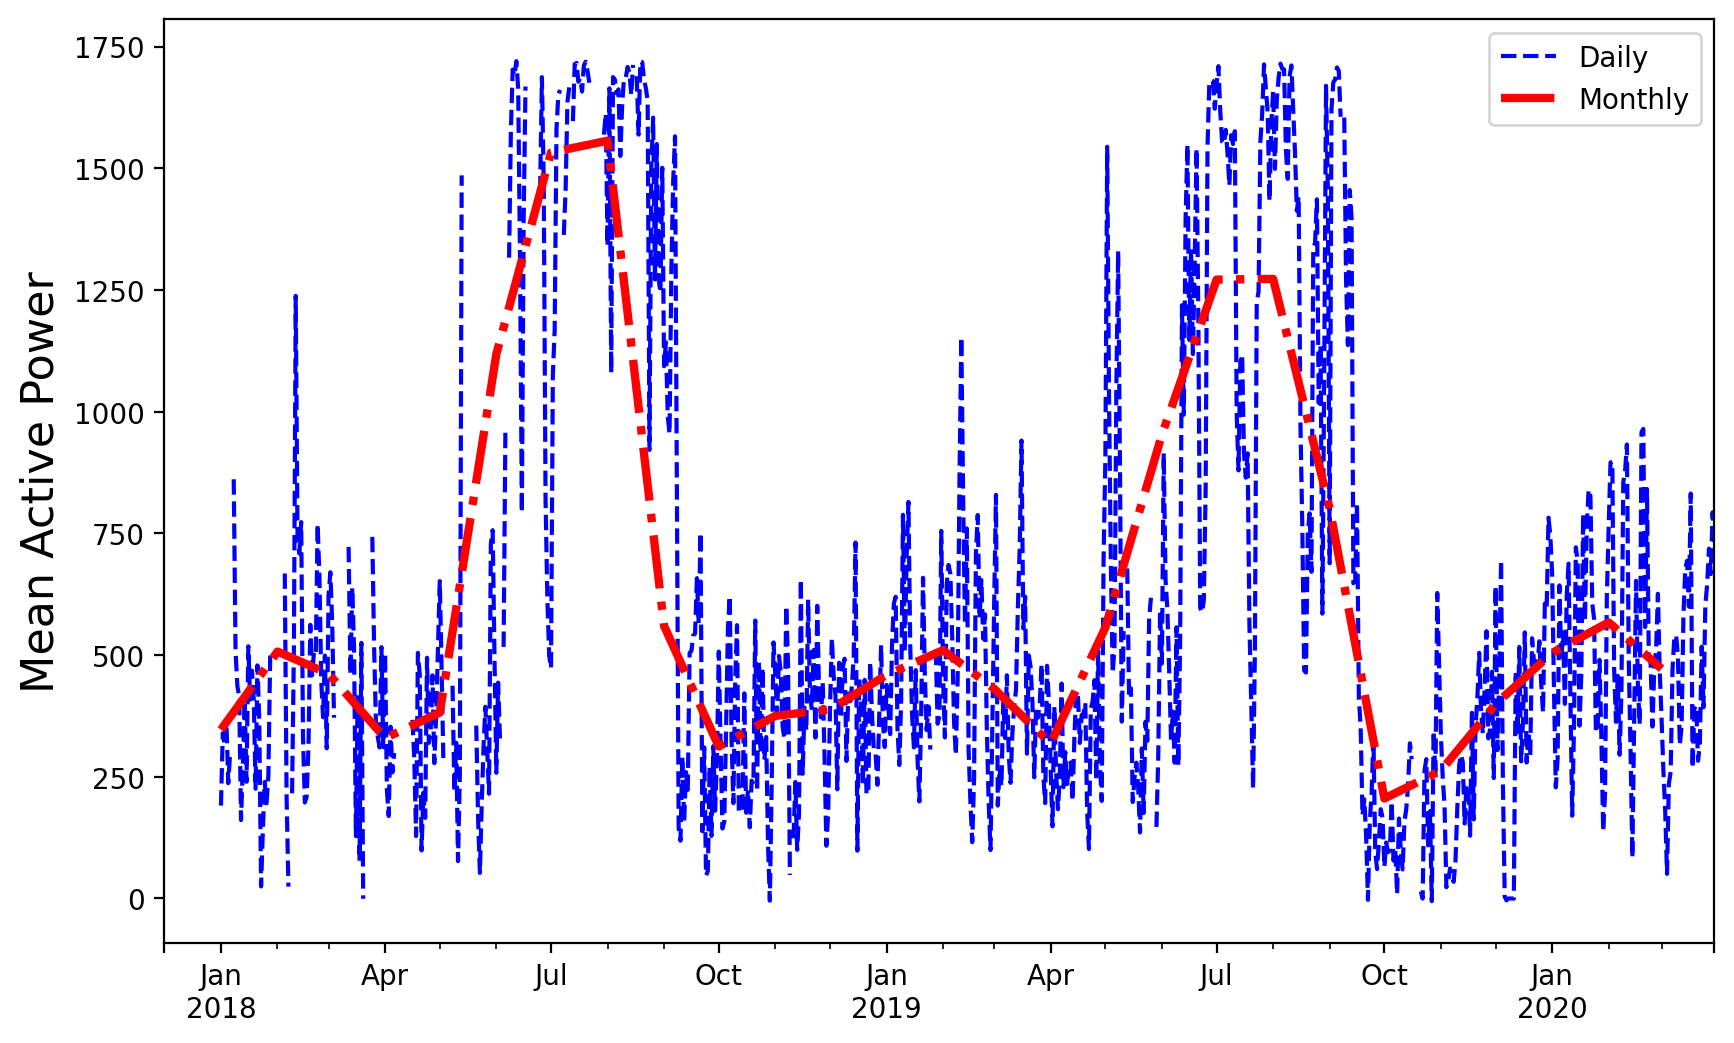

In [ ]:
# Resampling Power in daily timestep for better visual

plt.figure(figsize =(10, 6))
df_update['ActivePower'].resample('D').mean().plot(color = 'blue', label = 'Daily', linestyle='--')
df_update['ActivePower'].resample('M').mean().plot(color = 'red', label = 'Monthly', linestyle='-.', linewidth='3')
plt.legend()
plt.ylabel('Mean Active Power', fontsize= 16)
plt.show()

 The Active power changes or increases during this period of the year (in a Daily and Monthly) time step - roughly between May and September. As it can be seen, it is clean and easy to read. The graph shows that there are 2 peaks around the same period in two consecutive year. This will continue to repeat year after year. The major factor is the weather conditions.
It will be intersting to check the weed speed during the same the period of the year.

---



<ipython-input-27-5b633811b1a4>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_update['WindSpeed'].resample('M').mean().plot(color = 'red', label = 'Monthly', linestyle='-.', linewidth='3')


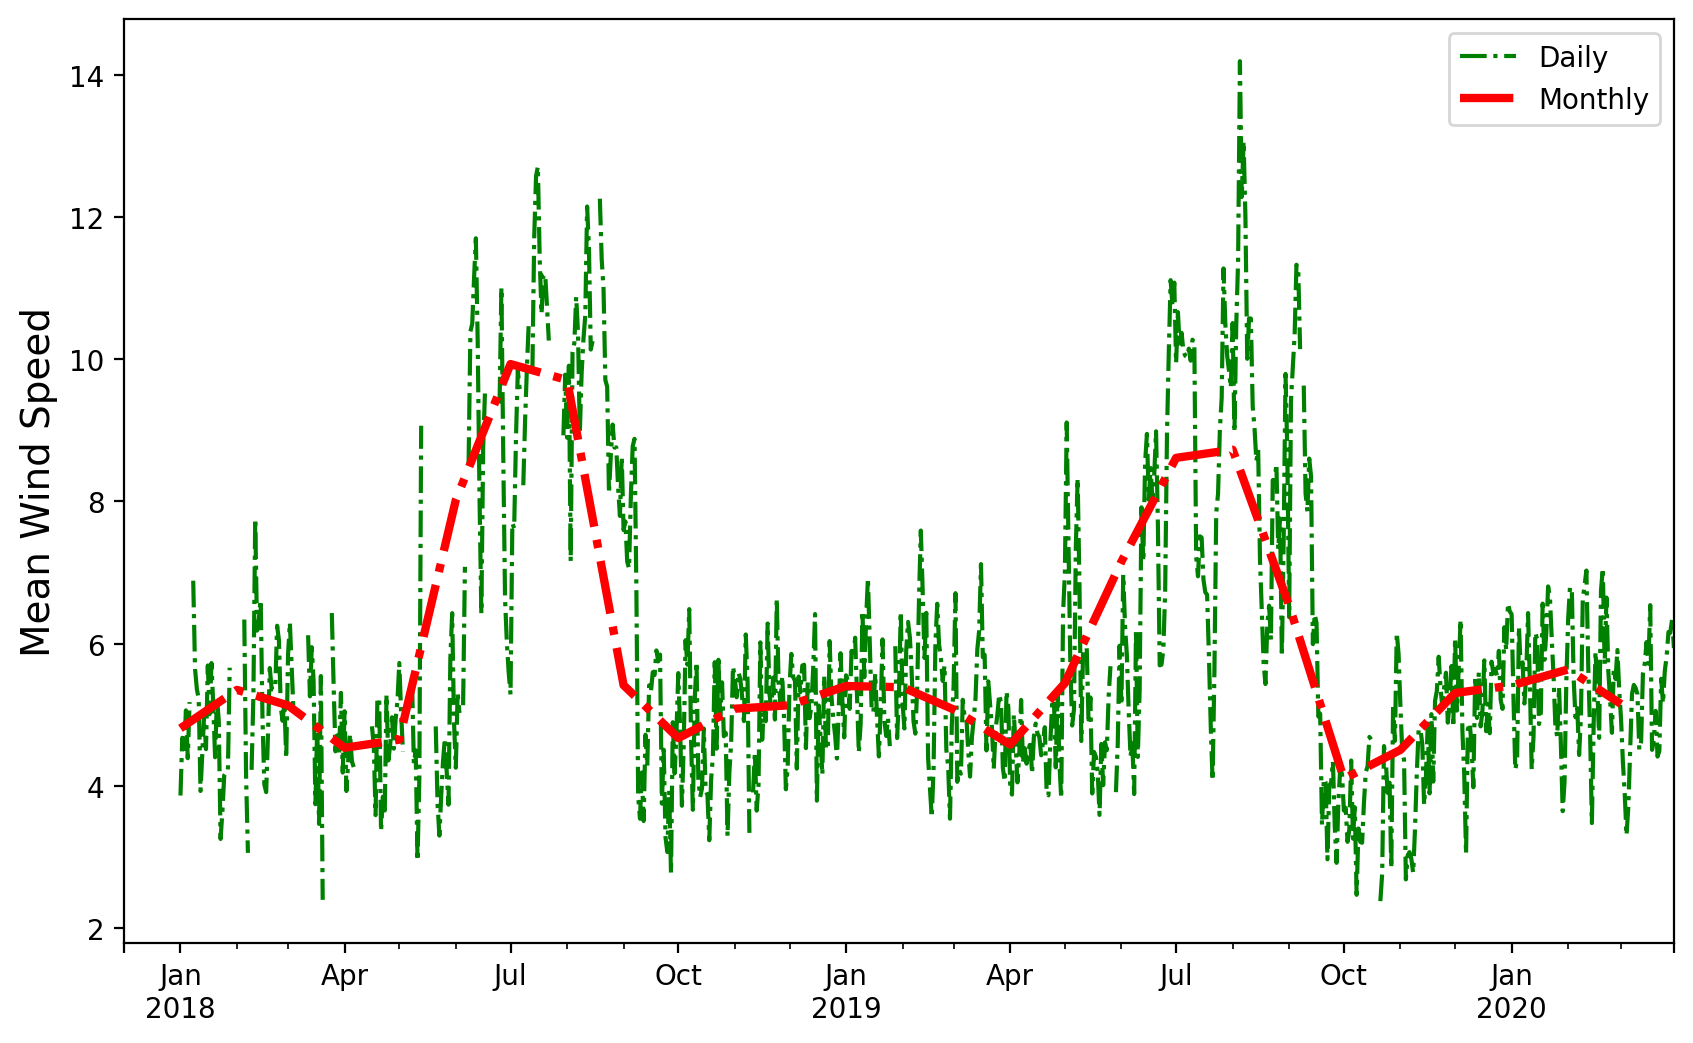

In [ ]:
## Wind Speed across the year

plt.figure(figsize =(10, 6))
df_update['WindSpeed'].resample('D').mean().plot(color = 'green', label = 'Daily', linestyle='-.')
df_update['WindSpeed'].resample('M').mean().plot(color = 'red', label = 'Monthly', linestyle='-.', linewidth='3')
plt.legend()
plt.ylabel('Mean Wind Speed', fontsize= 14)
plt.show()

The Wind Speed across the year in a Daily and Monthly time step. It looks similar to the Active power generated during the same period. It confirm the weather conditions factor during this period of the year. It is very windy during this time (May-Sept) in this part of the world.

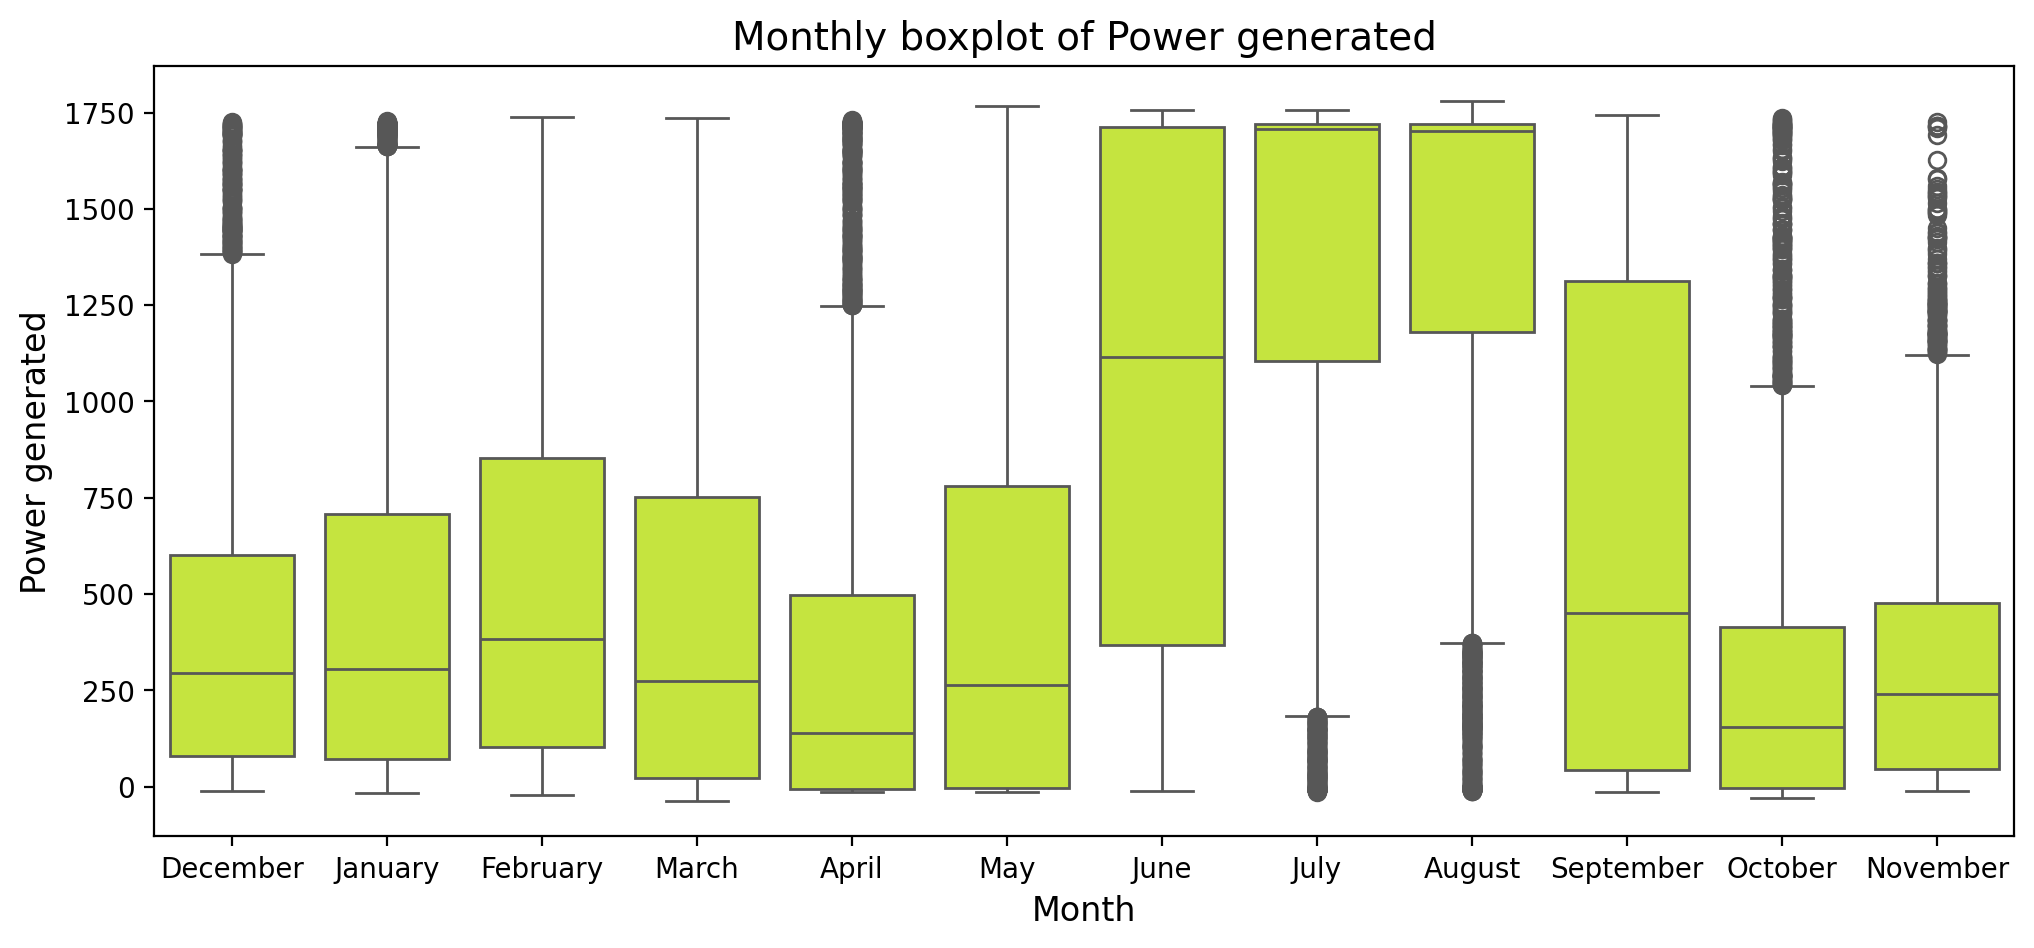

In [ ]:
# Active power Across on year period

plt.figure(figsize=(12, 5))
sns.boxplot(x =df_update.index.month_name(), y ="ActivePower", data =df_update, legend=False, palette="gist_ncar_r", hue=False)
plt.ylabel('Power generated', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Monthly boxplot of Power generated', fontsize = 14)
plt.show()

## Observation:
There is a good correlation between the blowing of wind and the power output peak during this time of the year.
## Note:
The data is clearer and easy to read when using daily, therefore resampling the dataset into daily timestep makes much sense.

In [ ]:
# First to resample the data to daily
df_daily = df_update[['ActivePower', 'WindSpeed']].resample('D').mean()
df_daily.dropna(inplace= True)
#len(df),
len(df_daily), df_daily.tail(3)

(750,
                            ActivePower  WindSpeed
 2020-03-28 00:00:00+00:00   666.476157   6.154856
 2020-03-29 00:00:00+00:00   793.461992   6.342303
 2020-03-30 00:00:00+00:00   733.101238   5.939229)

## Remark:
- Since it is a time series problem, we do not have independent/dependent variable (i.e input-X /output-Y) as in the usual ML problems.
- We only have input here. The independent variables is the series itself like:
![Loss_1.JPG](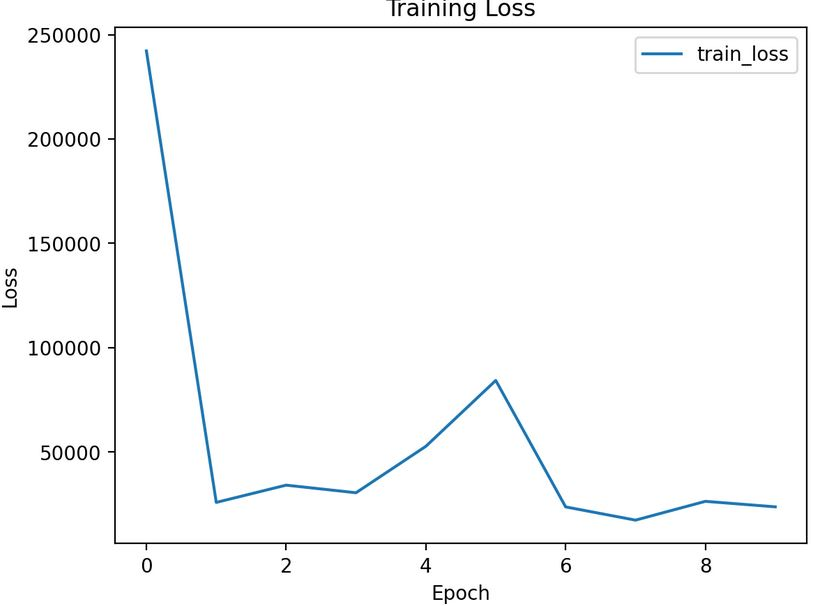![Loss_1.JPG](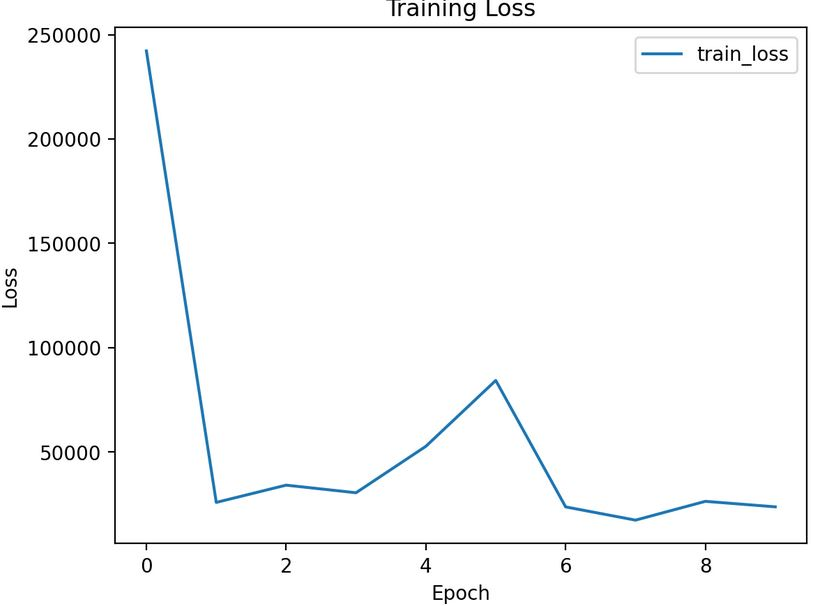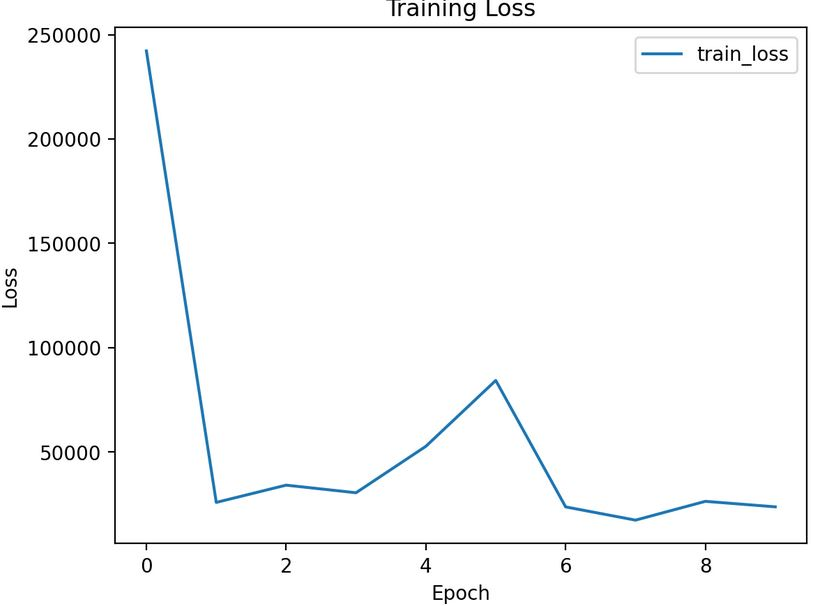))`Series: [2020-03-29 00:00:00+00:00   793.461992   6.342303]`

---


## 2.3. Defining a New Dataset
The dataset was defined with only one feature = Active Power

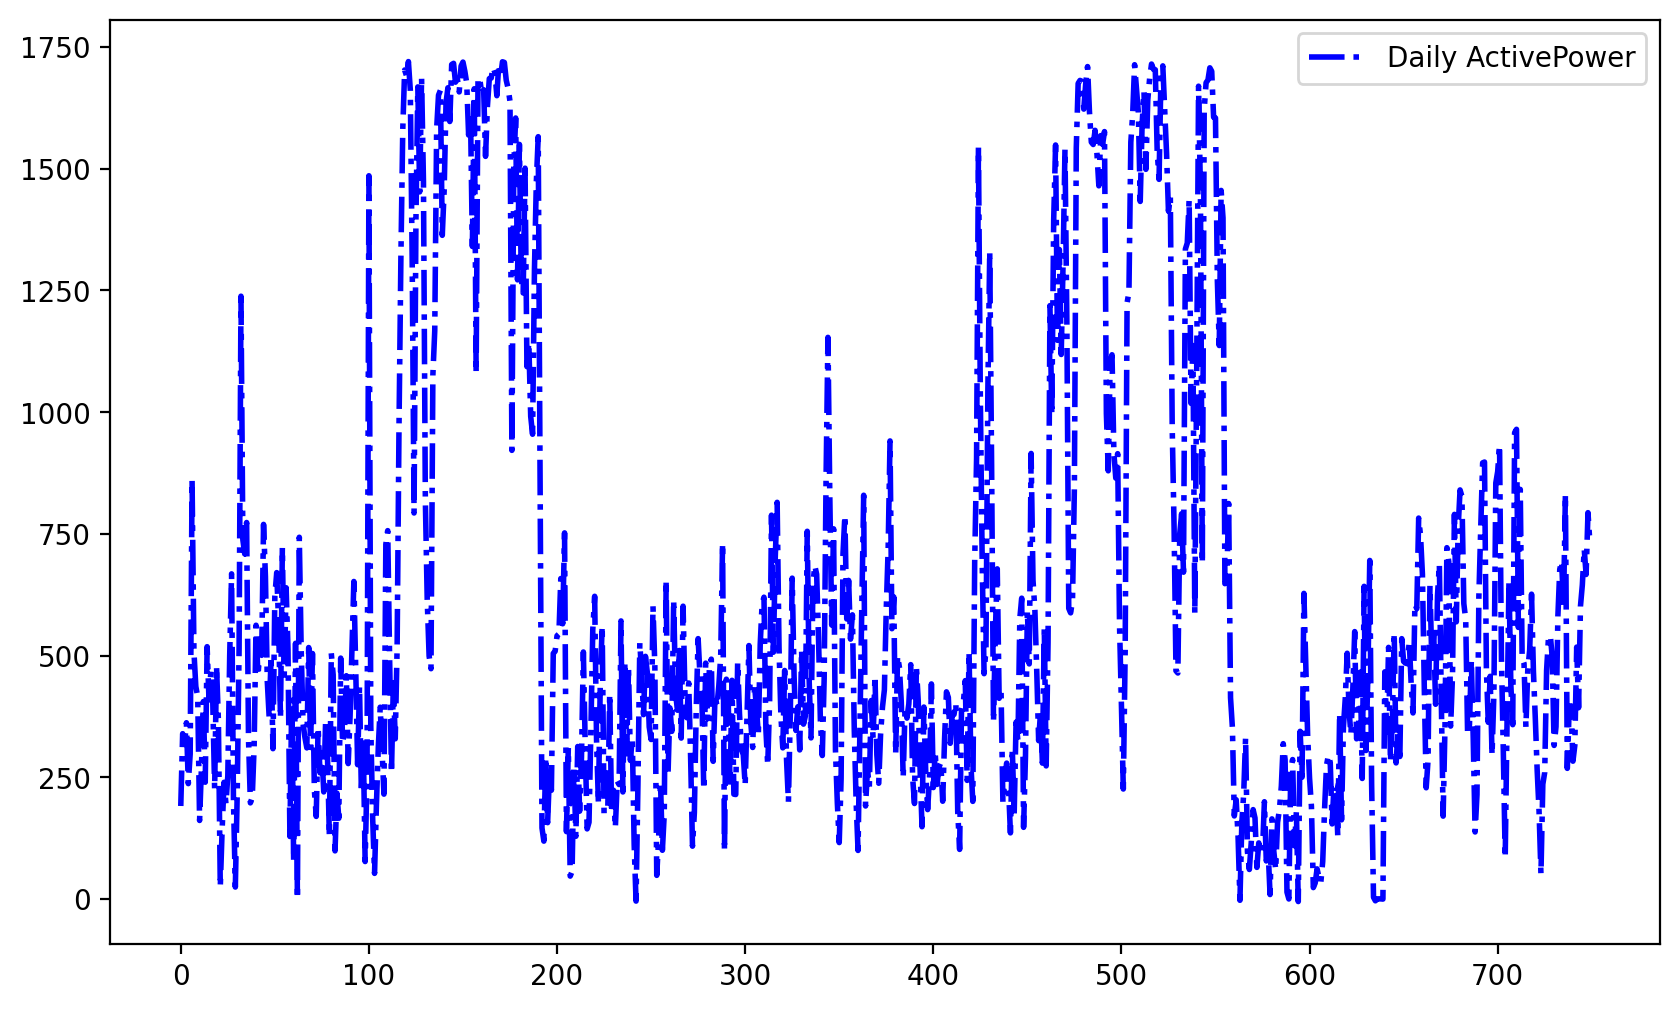

In [ ]:
# New dataSet to be used for the first part: Active Power as the only Input
timeseries = df_daily[['ActivePower']].values.astype('float32')
plt.figure(figsize=(10,6))
plt.plot(timeseries, label= 'Daily ActivePower', color='b', linestyle='-.', linewidth='2')
plt.legend()
plt.show()

In [ ]:
print('First 5 points of the Target Column[ActivePower]:', timeseries[:, 0][:5])
print('We can see the Target Power which values are 3 digits of Active Power [Watt]')

First 5 points of the Target Column[ActivePower]: [190.81548 339.47028 317.51764 361.8567  236.78362]
We can see the Target Power which values are 3 digits of Active Power [Watt]


#3. Train, Test, Split the Data for training

In [ ]:
# train-test split for time series
train_size = int(len(timeseries) * 0.80)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
# train.shape, test.shape
#******* Create a DataSet & Sequence Length input ********
""" Use 80% (600 rows or days) of previous data as a guide to forecasting
                                        the next 20% (150 rows or days) values
        (this makes sense given there is a yearly pattern)
     This means the data will be as follows:
                                [Batch_size, Sequence_length, input_Size
                             feature(600, 1, 1), target(600, 1, 1)"""
# Define a function
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback of sequence: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [ ]:
# #*******Create X & Y elements of the batch***********
# feature and the “target” the same shape
lookback = 1  # Sequence length
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
# Print feature and target shapes
print('Train Inputs shape:', X_train.shape, 'Train Target shape:', y_train.shape)
print('Test Inputs shape:', X_test.shape, 'Test Target shape:', y_test.shape)

Train Inputs shape: torch.Size([599, 1, 1]) Train Target shape: torch.Size([599, 1, 1])
Test Inputs shape: torch.Size([149, 1, 1]) Test Target shape: torch.Size([149, 1, 1])


<ipython-input-31-ebd308f871f7>:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(X), torch.tensor(y)


 Build the RNN Model: `class Model(nn.Module)`. And define de Feed-forward function `def forward(self,x):`

# **4. Part 1**
In this First part we are going to use only one feature = Active Power
##`The LSTM Model`

In [ ]:
# Import important Library
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.utils.data as data
"""#*********Defining the LSTM Model *********"""
import torch.nn as nn
class LSTM_Model(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        # Define the output layer
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        # Forward propagate LSTM
        x, _ = self.lstm(x)
        # Decode the hidden state/output layer
        x = self.linear(x)
        print(x.shape)
        return x

# Instantiate
model = LSTM_Model()
model

LSTM_Model(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

## 4.1. Training the LSTM Model `Turn on the Gradient`

In [ ]:
# Define loss function and optimizer
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
# Create a Train and Test Data loader
# So far best batch = 8
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
# Number of epochs
n_epochs = 1000
train_loss = []
test_loss = []
# Training the RNN Model Turn on the Gradient
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # Calculate loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        # Backpropagate and update weights
        loss.backward()
        optimizer.step()
        # print(y_pred.shape)
        # break
        # Validation
    if epoch % 100!= 0:
        continue
    model.eval()
    # Turn off Gradient for Validation
    with torch.no_grad():
        # Make training prediction
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        train_loss.append(loss_fn(y_pred, y_train).item())

        # Make testing prediction
        prediction = model(X_test)
        test_rmse = np.sqrt(loss_fn(prediction, y_test))
        test_loss.append(loss_fn(prediction, y_test).item())
        # Root mean square Error (RMSE): A lower RMSE indicates that the model fits the dataset better
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size

<ipython-input-34-69a9d365a289>:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  train_rmse = np.sqrt(loss_fn(y_pred, y_train))
<ipython-input-34-69a9d365a289>:37: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  test_rmse = np.sqrt(loss_fn(prediction, y_test))


Streaming output truncated to the last 5000 lines.
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
torch.Size([8, 1, 1])
tor

Description1:
The MSE was used as a loss function, Adam as an optimization function. The model was trained for 1000 epochs for better training and conversion.
The train RMSE =316.39, and test RMSE = 183.92

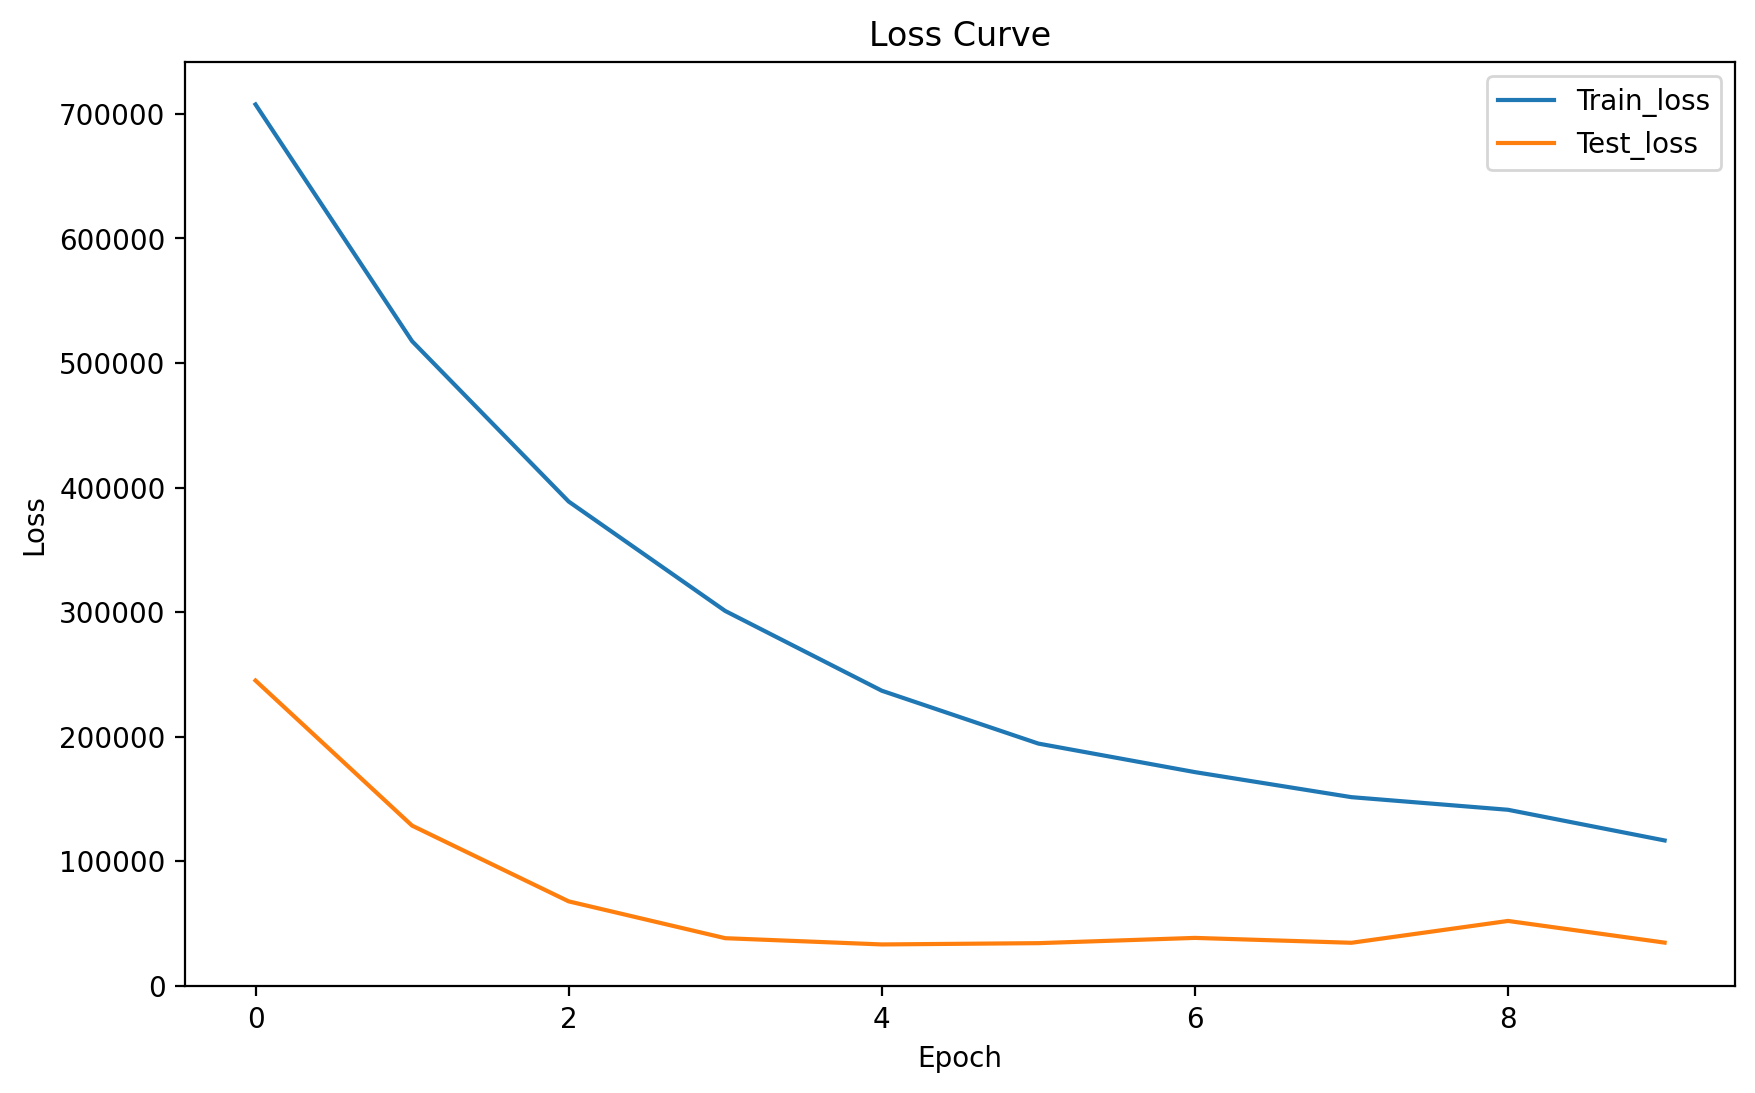

In [ ]:
# Plot the loss curve 1
plt.figure(figsize=(10,6))
plt.plot(train_loss, label="Train_loss")
plt.plot(test_loss, label= 'Test_loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Obeservation:
The loss curves converge toward zero

## 4.2. Testing `Turn off Gradient for testing`

torch.Size([599, 1, 1])
torch.Size([599, 1, 1])
torch.Size([149, 1, 1])


<ipython-input-37-c8e06945b03c>:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  train_plot[lookback:train_size] = model(X_train)[:, -1, :]
<ipython-input-37-c8e06945b03c>:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  test_plot[train_size + lookback:len(timeseries)] = model(X_test)[:, -1, :]


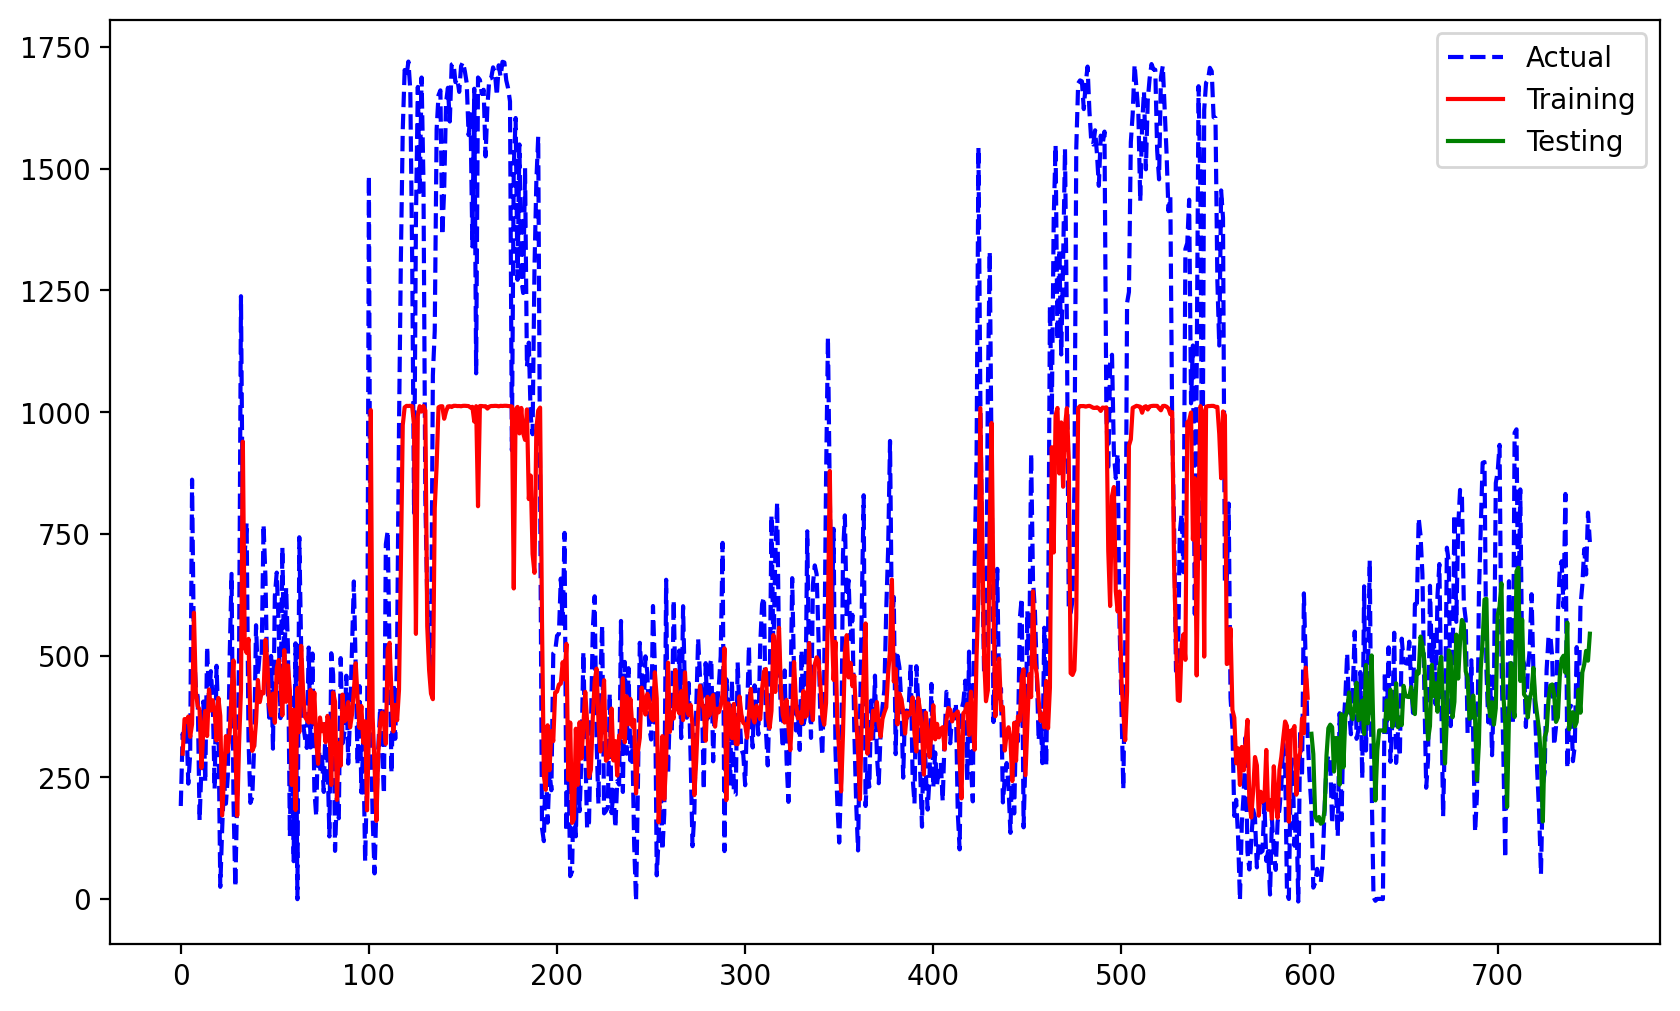

In [ ]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size + lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.figure(figsize=(10,6))
plt.plot(timeseries, c='b', label='Actual', linestyle='--')
plt.plot(train_plot, c='r', label='Training')
plt.plot(test_plot, c='g', label='Testing')
plt.legend()
plt.show()

## Observation
The Model works perfectly. We can see the Actual data in blue.
The red describe the training data, which fits well with the actual data.
In green we have the testing data ad they also fit perfectly with the actual data.
This confirms that the model is able to generalise on the unseen data.

It was also observed that te changing of batch size and sequence length do not have effect on the model performance in this case.

In [ ]:
# Shape of prediction and labels data
y_test.shape, model(X_test).shape

(torch.Size([149, 1, 1]), torch.Size([149, 1, 1]))

The predicted values have the exactelly same shape as the labels. This shows that they have been well converted.

In [ ]:
# # DataFrame: predicted and Actual values
actual1 = y_test.numpy()
actual1 = actual1.reshape(-1, 1).reshape(-1)
# print('Actual', actual_1.shape)
predict1 = prediction.detach().numpy()
predict1 = predict1.reshape(-1, 1).reshape(-1)
# print('Predicted', predict1.shape)
dataframe1 = pd.DataFrame(data = {'Label1':actual1, 'Prediction1': predict1}, index = df_daily[601:].index)
dataframe1

Label1  Prediction1
2019-11-03 00:00:00+00:00  189.996338   349.066071
2019-11-04 00:00:00+00:00   23.167261   306.283630
2019-11-05 00:00:00+00:00   32.695957   165.564362
2019-11-06 00:00:00+00:00   61.686188   162.922394
2019-11-07 00:00:00+00:00   44.061394   179.301407
...                               ...          ...
2020-03-26 00:00:00+00:00  644.979126   463.674133
2020-03-27 00:00:00+00:00  718.695312   495.561584
2020-03-28 00:00:00+00:00  666.476135   565.807373
2020-03-29 00:00:00+00:00  793.461975   513.844238
2020-03-30 00:00:00+00:00  733.101257   656.185669

[149 rows x 2 columns]

## 4.3. Plot the graphs

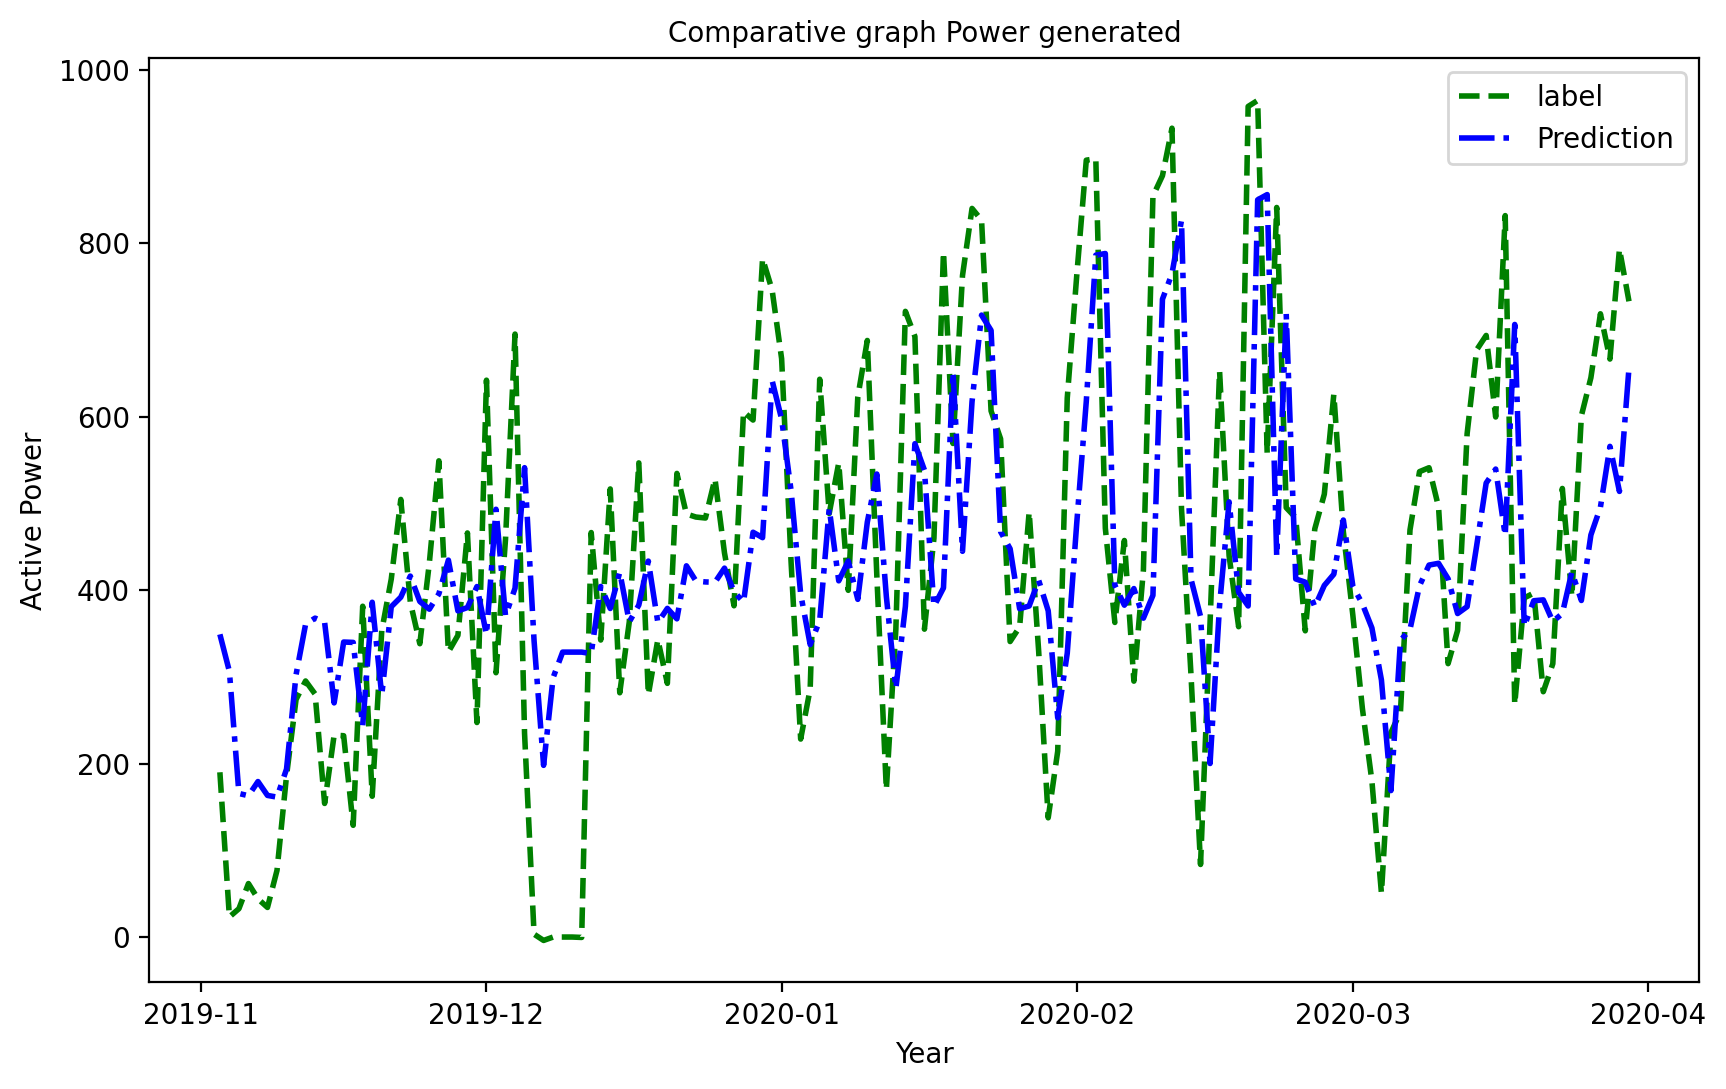

In [ ]:
# Plot the Predicted and label graph
plt.figure(figsize=(10,6))
plt.plot(dataframe1['Label1'], label = 'label', color ='green', linestyle='--', linewidth='2')
plt.plot(dataframe1['Prediction1'], label='Prediction', color = 'blue', linestyle='-.', linewidth='2')
plt.ylabel('Active Power')
plt.xlabel('Year')
plt.title('Comparative graph Power generated', fontsize = 10)
plt.legend()
plt.show()

## 4.3. Performance Metrix for Rgression models:
The MSE, MAPE, R squared  ars excellent for regression methods.
1. Mean Square Error (MSE): A lower MSE indicates that the model’s predictions are closer to the actual values.
2. Mean Absolute Percentage Error (MAPE): Lower MAPE indicates a better fit for the model.
3. Calculate R²: A higher R² indicates a better fit for the model.

In [ ]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Calculate PERFOREMNACE
# 1. Lower MSE: A lower MSE indicates that the model’s predictions are closer to the actual values.
mse1 = mean_squared_error(dataframe1['Label1'], dataframe1['Prediction1'])

# 2. Mean Absolute Percentage Error (MAPE): Lower MAPE indicates a better fit for the model.
LR_MAPE1 = mean_absolute_percentage_error(dataframe1['Prediction1'], dataframe1['Label1'])
# 3. Calculate R²: A higher R² indicates a better fit for the model.
LR_R2a = r2_score(dataframe1['Label1'], dataframe1['Prediction1'])

# Print
print(f"The Mean Squared Error (MSE) is: {mse1.item():.4f}")
print(f"Mean Absolute Percentage Error MAPE: {LR_MAPE1:.2f}%")
print(f"R² (Coefficient of Determination): {LR_R2a:.4f}")

The Mean Squared Error (MSE) is: 33829.9883
Mean Absolute Percentage Error MAPE: 0.39%
R² (Coefficient of Determination): 0.3653


## Observation of the performance
From the first permance metrics, lower MSE and MAPE indicates that the model’s predictions are closer to the actual values.
MAPE gives good results because the value is MAPE= 0.39% ~ 39%. Meaning it is about `61% accurate`, in other words the predicted values are 61% closer to the actuals.
The MSE, on the other hand, gives a big error when compared the predicted and actual values. Which is not very good based on the definition.
However, if we look at the comparitive graph of power generated, it does makes sense, because the label and the predicted values are not very close.
And this confirmed by the Coefficient of Determination `0.3653`, which is pretty low.
But all overall, the model generalizes very well as the predicted graph follows the trend.

# **5. Part 2**
# 5.1. Defining a New Dataset
The dataset was defined with two features: Wind Speed and Active Power

In this second part we are going to use [Wind Speed] as input and [Active Power] as target.

In [ ]:
# timeseries 2
timeseries2 = df_daily[['WindSpeed','ActivePower']].values.astype('float32')
# plt.plot(timeseries[:, 1])
# plt.show()
print('First 5 points of the Target Column[ActivePower]:', timeseries2[:, 1][:5])
print('\nFirst 5 points of the Feature Column[WindSpeed]:', timeseries2[:, 0][:5])
print('\nWe can well see there is a difference between Target Power which values are 3 digits, compared to windSpeed which values are [3,20]m/s')

First 5 points of the Target Column[ActivePower]: [190.81548 339.47028 317.51764 361.8567  236.78362]

First 5 points of the Feature Column[WindSpeed]: [3.8662264 4.6778436 4.520639  5.0631967 4.3911443]

We can well see there is a difference between Target Power which values are 3 digits, compared to windSpeed which values are [3,20]m/s


In [ ]:
# Preparing the data for RNN: Here we are working Wihout WinSpeed
# train-test split for time series
train_size2 = int(len(timeseries2) * 0.80)
test_size2 = len(timeseries2) - train_size2
train2, test2 = timeseries2[:train_size2], timeseries2[train_size2:]
# train.shape, test.shape

def create_dataset2(dataset2, lookback2):
    """Transform a time series into a prediction dataset
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X2, y2 = [], []
    for i in range(len(dataset2)-lookback2):
        feature2 = dataset2[i:i+lookback2]
        target2 = dataset2[i + 1:i + lookback2 +1]
        X2.append(feature2)
        y2.append(target2)
    return torch.tensor(X2), torch.tensor(y2)
train2.shape, test2.shape

((600, 2), (150, 2))

##Observation:
The dataset created shows that there are two columns, one for Windspeed and the other for Active power.
This will allow us to consider Windspeed as inputs and Activepower as target.

In [ ]:
lookback2 = 1 # Sequence Length
X_train2, y_train2 = create_dataset2(train2, lookback2 = lookback2)
X_test2, y_test2 = create_dataset2(test2, lookback2 = lookback2)

X_train2, y_train2 = X_train2[:, :, :1],  y_train2[:, :, 1:]
X_test2, y_test2 = X_test2[:, :, :1], y_test2[:, :, 1:]
# Print the shapes
print('Train Inputs shape:', X_train2.shape, 'Train Target shape:', y_train2.shape)
print('Test Inputs shape:', X_test2.shape, 'Test Target shape:', y_test2.shape)

Train Inputs shape: torch.Size([599, 1, 1]) Train Target shape: torch.Size([599, 1, 1])
Test Inputs shape: torch.Size([149, 1, 1]) Test Target shape: torch.Size([149, 1, 1])


The variables have been converted to Tensors with the third value. They read such as [[batch size], [sequence length], [input size]]. The input size is selected appropietly by slicing the columns such that X inputs take the first Windspeed column and Y inputs take the second Activepower target column.

## 5.2. Define LSTM Model 2
I kept all parameters and hyperparameters the same as the first part for conformity. This will allow us to see any potential change in the process.
The only difference is the Input = WindSpeed and Target = ActivePower

In [ ]:
import torch.nn as nn
# Define the LSTM network
class LSTM_Model2(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        # Define the output layer
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        # Forward propagate LSTM
        x, _ = self.lstm(x)
        # Decode the hidden state/output layer
        x = self.linear(x)
        return x
# Instantiate
model2 = LSTM_Model2()
model2

LSTM_Model2(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

##5.3. Train and Test the Model

In [ ]:
# Define loss function and optimizer
optimizer2 = optim.Adam(model2.parameters())
loss_fn2 = nn.MSELoss()
loader2 = data.DataLoader(data.TensorDataset(X_train2, y_train2), shuffle=True, batch_size=8)

train_loss2 = []
test_loss2 = []
num_epochs = 1000
for epoch in range(num_epochs):
    model2.train()
    for X_batch2, y_batch2 in loader2:
        # Make prediction
        y_prediction = model2(X_batch2)
        # Calculate the loss
        loss2 = loss_fn2(y_prediction, y_batch2)
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()
        # print(y_pred.shape)
        # break
    # Validation 2
    if epoch % 100!= 0:
         continue
    model2.eval()
    with torch.no_grad():
        # Train prediction
        y_prediction = model2(X_train2)
        train_rmse2 = np.sqrt(loss_fn2(y_prediction, y_train2))
        train_loss2.append(loss_fn2(y_prediction, y_train2).item())
        # Test prediction
        prediction2 = model2(X_test2)
        test_rmse2 = np.sqrt(loss_fn2(prediction2, y_test2))
        test_loss2.append(loss_fn2(prediction2, y_test2).item())
        # Root mean square Error (RMSE)
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse2, test_rmse2))

<ipython-input-47-1abd6ca56321>:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  train_rmse2 = np.sqrt(loss_fn2(y_prediction, y_train2))
<ipython-input-47-1abd6ca56321>:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  test_rmse2 = np.sqrt(loss_fn2(prediction2, y_test2))


Epoch 0: train RMSE 841.0604, test RMSE 494.9955
Epoch 100: train RMSE 646.7434, test RMSE 281.9076
Epoch 200: train RMSE 525.7108, test RMSE 198.7010
Epoch 300: train RMSE 428.8267, test RMSE 190.4852
Epoch 400: train RMSE 350.0931, test RMSE 195.4906
Epoch 500: train RMSE 291.5613, test RMSE 196.6241
Epoch 600: train RMSE 256.6815, test RMSE 194.7870
Epoch 700: train RMSE 241.2822, test RMSE 193.4618
Epoch 800: train RMSE 235.8653, test RMSE 192.1548
Epoch 900: train RMSE 233.3363, test RMSE 193.2040


## Description:
The MSE was used as a loss function, Adam as an optimization function. The model was trained for 1000 epochs for better training and conversion.
The train RMSE = 233.14, and test RMSE = 192.37

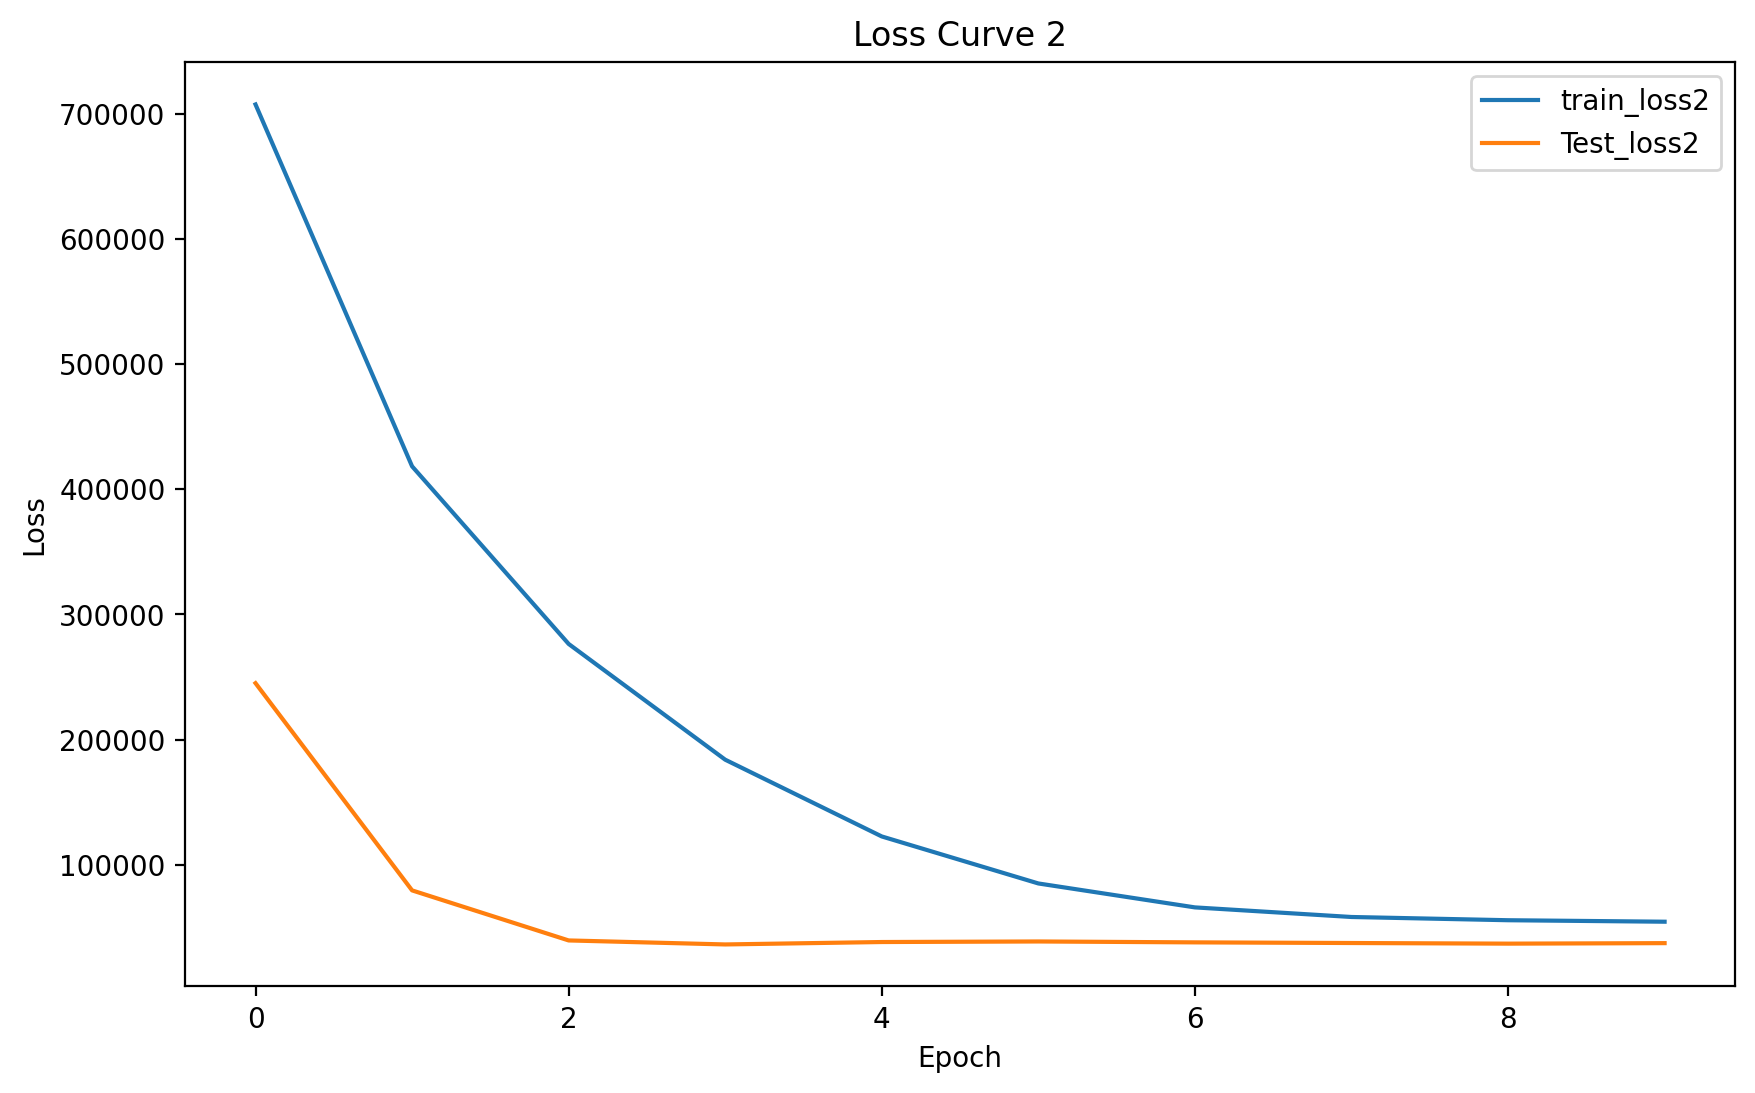

In [ ]:
# Plot the loss curve 2
plt.figure(figsize=(10,6))
plt.plot(train_loss2, label="train_loss2")
plt.plot(test_loss2, label= 'Test_loss2')
plt.title("Loss Curve 2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Both the loss graphs converge to zero, which is a good indicator of training and testing of the model

##5.4. Plot the graphs

<ipython-input-49-c03af2aad14b>:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  train_plot2[lookback2:train_size2] = model2(X_train2)[:, -1, :]
<ipython-input-49-c03af2aad14b>:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  test_plot2[train_size+lookback:len(timeseries2)] = model2(X_test2)[:, -1, :]


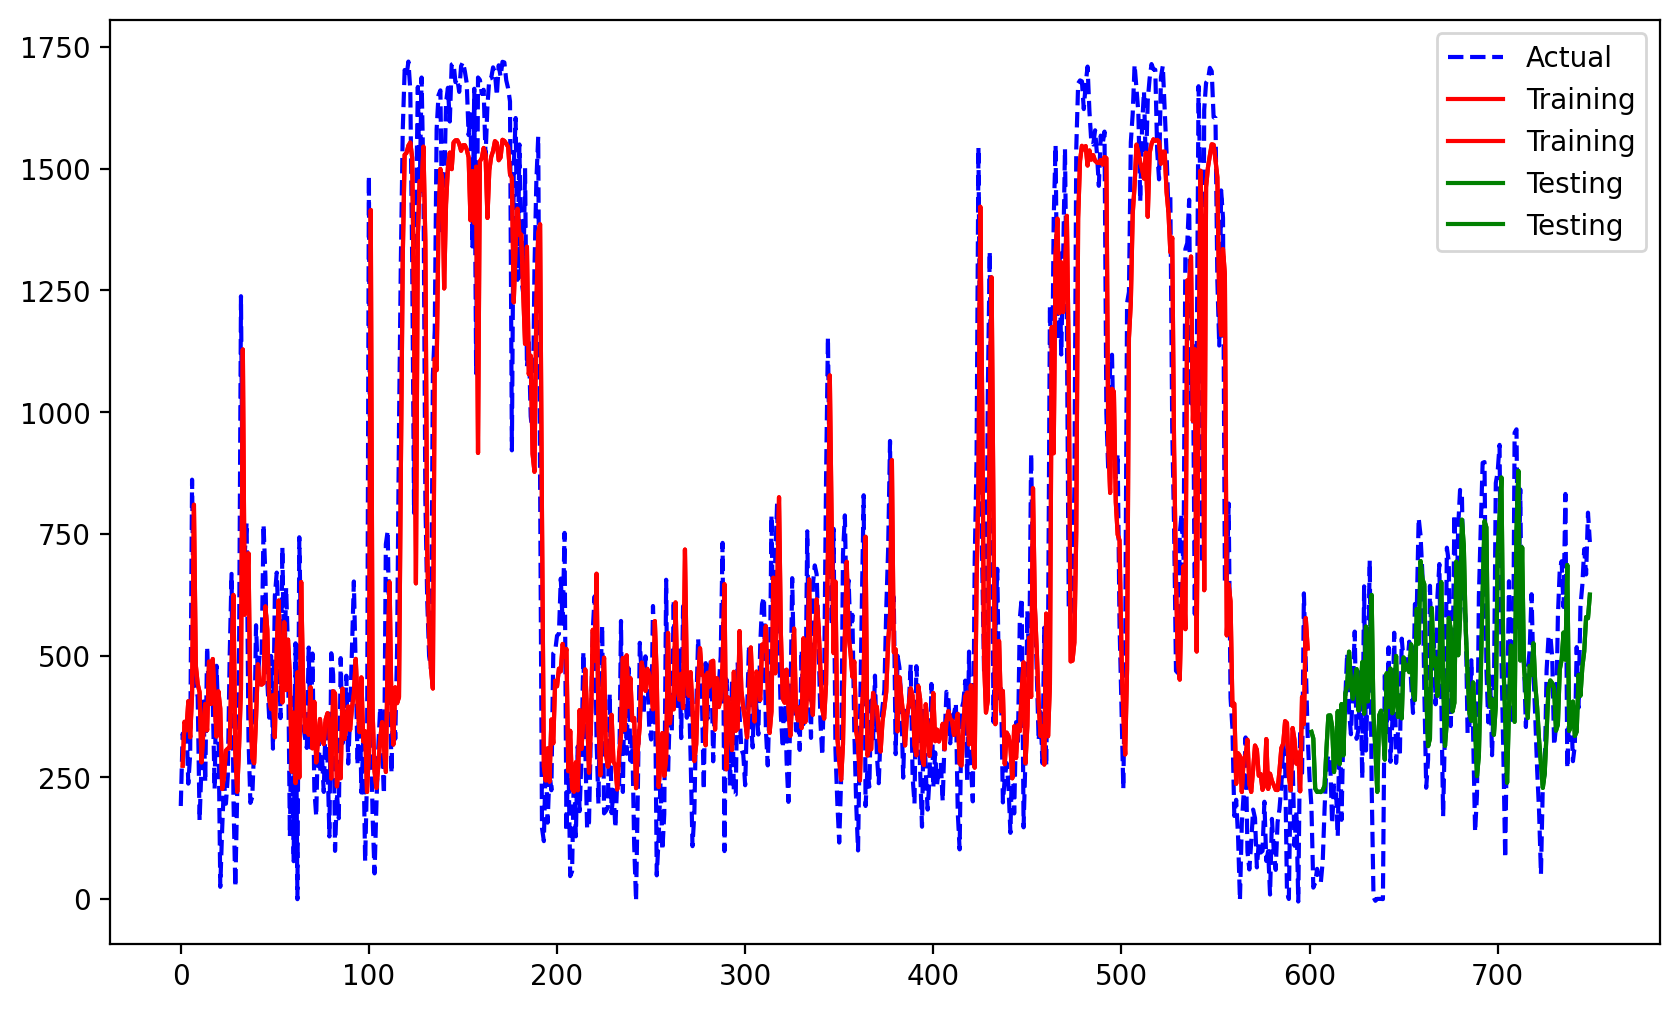

In [ ]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot2 = np.ones_like(timeseries2) * np.nan
    y_pred2 = model2(X_train2)
    y_pred2 = y_pred2[:, -1, :]
    train_plot2[lookback2:train_size2] = model2(X_train2)[:, -1, :]
    # shift test predictions for plotting
    test_plot2 = np.ones_like(timeseries2) * np.nan
    test_plot2[train_size+lookback:len(timeseries2)] = model2(X_test2)[:, -1, :]
# Plot
plt.figure(figsize=(10,6))
plt.plot(timeseries2[:, 1], c='b', label='Actual', linestyle='--')
plt.plot(train_plot2, c='r', label='Training')
plt.plot(test_plot2, c='g', label='Testing')
plt.legend()
plt.show()

## Observation
The Model works perfectly. We can see the Actual data in blue.
The red describe the training data, which fits well with the actual data.
In green we have the testing data ad they also fit perfectly with the actual data.
This confirms that the model is able to generalise on the unseen data.

It was also observed that te changing of batch size and sequence length do not have effect on the model performance in this case.

In [ ]:
# Shape of prediction and labels data
y_test2.shape, model2(X_test2).shape

(torch.Size([149, 1, 1]), torch.Size([149, 1, 1]))

The predicted values have the exactelly same shape as the labels. This shows that they have been well converted.

In [ ]:
# # DataFrame: predicted and Actual values
actual2 = y_test2.numpy()
actual2 = actual2.reshape(-1, 1).reshape(-1)
# print('Actual', actual_1.shape)
predict2 = prediction2.detach().numpy()
predict2 = predict2.reshape(-1, 1).reshape(-1)
# print('Predicted', predict1.shape)
dataframe2 = pd.DataFrame(data = {'Label2':actual2, 'Prediction2': predict2}, index = df_daily[601:].index)
dataframe2

Label2  Prediction2
2019-11-03 00:00:00+00:00  189.996338   343.447174
2019-11-04 00:00:00+00:00   23.167261   329.270111
2019-11-05 00:00:00+00:00   32.695957   228.182831
2019-11-06 00:00:00+00:00   61.686188   221.123077
2019-11-07 00:00:00+00:00   44.061394   221.569458
...                               ...          ...
2020-03-26 00:00:00+00:00  644.979126   486.016754
2020-03-27 00:00:00+00:00  718.695312   519.492737
2020-03-28 00:00:00+00:00  666.476135   592.115967
2020-03-29 00:00:00+00:00  793.461975   589.655029
2020-03-30 00:00:00+00:00  733.101257   638.857422

[149 rows x 2 columns]

##5.5. Plot the Predicted Results

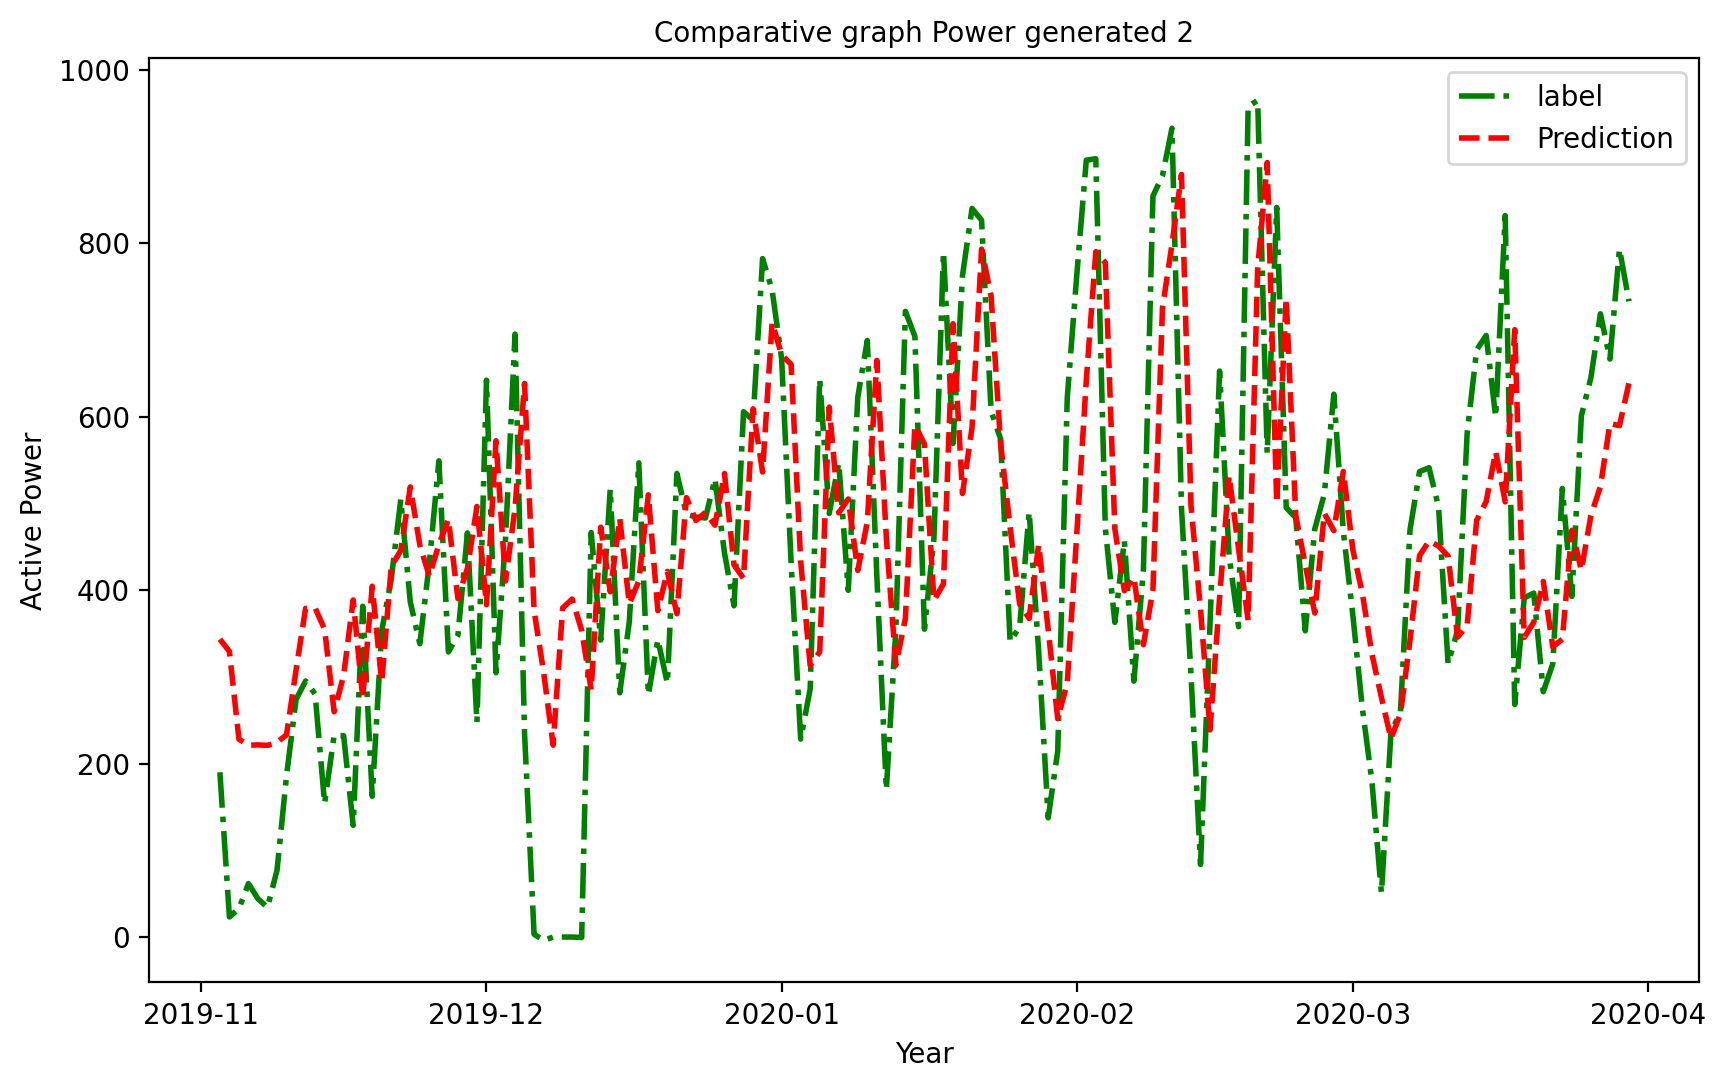

In [ ]:
# Plot the test graph
plt.figure(figsize=(10,6))
plt.plot(dataframe2['Label2'], label = 'label', color ='green', linestyle='-.', linewidth='2')
plt.plot(dataframe2['Prediction2'], label='Prediction', color = 'red', linestyle='--', linewidth='2')
plt.ylabel('Active Power')
plt.xlabel('Year')
plt.title('Comparative graph Power generated 2', fontsize = 10)
plt.legend()
plt.show()

##5.6. Performance Metrix for LSTM Regression model2:
The R squared, MAPE, MSE ars excellent for these methods

In [ ]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Calculate PERFOREMNACE
# 1. Lower MSE: A lower MSE indicates that the model’s predictions are closer to the actual values.
mse2 = mean_squared_error(dataframe2['Label2'], dataframe2['Prediction2'])

# 2. Mean Absolute Percentage Error (MAPE): Lower MAPE indicates a better fit for the model.
LR_MAPE2 = mean_absolute_percentage_error(dataframe2['Prediction2'], dataframe2['Label2'])
# 3. Calculate R²: A higher R² indicates a better fit for the model.
LR_R2b = r2_score(dataframe2['Label2'], dataframe2['Prediction2'])

# Print
# print(f"The Mean Squared Error (MSE) is: {mse2.items():.4f}")
print(f"Mean Absolute Percentage Error MAPE: {LR_MAPE2:.2f}%")
print(f"R² (Coefficient of Determination): {LR_R2b:.4f}")

Mean Absolute Percentage Error MAPE: 0.37%
R² (Coefficient of Determination): 0.2997


## Observation of the performance
From the first permance metrics, lower MSE and MAPE indicates that the model’s predictions are closer to the actual values.
MAPE gives good results because the value is MAPE= 0.37% ~ 37%. Meaning it is about `63% accurate`, in other words the predicted values are 63% closer to the actuals.
The MSE, on the other hand, gives a big error MSE= 37009.8320 when compared the predicted and actual values. Which is not very good based on the definition.
However, if we look at the comparitive graph of power generated, it does makes sense, because the label and the predicted values are not very close.
And this confirmed by the Coefficient of Determination `0.3053`, which is pretty low.
But all overall, the model generalizes very well as the predicted graph follows the trend.

#7. Random Forest Model
With Random Forest, I realize the way of preparing the data is a bit different. Therefore, I am repeating the process of Train, Test and Split here.
# Part 1 of RF
The first part also we consider the only input is the Active power.
We are using 80% of the dataset for training to predict the 20% of the dataset.


##7.1 Train, Test, Split of the data

In [ ]:
from sklearn.model_selection import train_test_split
# Inputs as Active power
data_2 = df_daily['ActivePower']
# Data are split into X as input variable and Y
x_data = data_2[:375]
y_data = data_2[375:]
# x_data.shape, y_data.shape
## Reshape the data
xdata = x_data.values.reshape(-1,1)
ydata = y_data.values.reshape(-1)
xdata.shape, ydata.shape
# We are using 80% of the dataset for training to predict the 30 days after that
# Split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(xdata, ydata, test_size=0.20, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((300, 1), (75, 1), (300,), (75,))

## 7.2. Defining the Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Calculate accuracy
from sklearn.linear_model import LinearRegression
## RandomForest Regressor Model
rf_regr = RandomForestRegressor(n_estimators=1000 ,max_depth=2, random_state=42)
# Fit the X, y Data
rf_regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=42)

##7.3. Traing and Testing the model

In [ ]:
# Make predictions on the train set
y__predict = rf_regr.predict(train_X)
# Make predictions on the test set
prediction2 = rf_regr.predict(test_X)
# Prediction
print('Prediction 2:', prediction2[0:3],'==','Label:', test_y[0:3])

Prediction 2: [1388.32237941  560.16692012  530.99095521] == Label: [1451.98449081  413.87536137  195.9365796 ]


****************************************


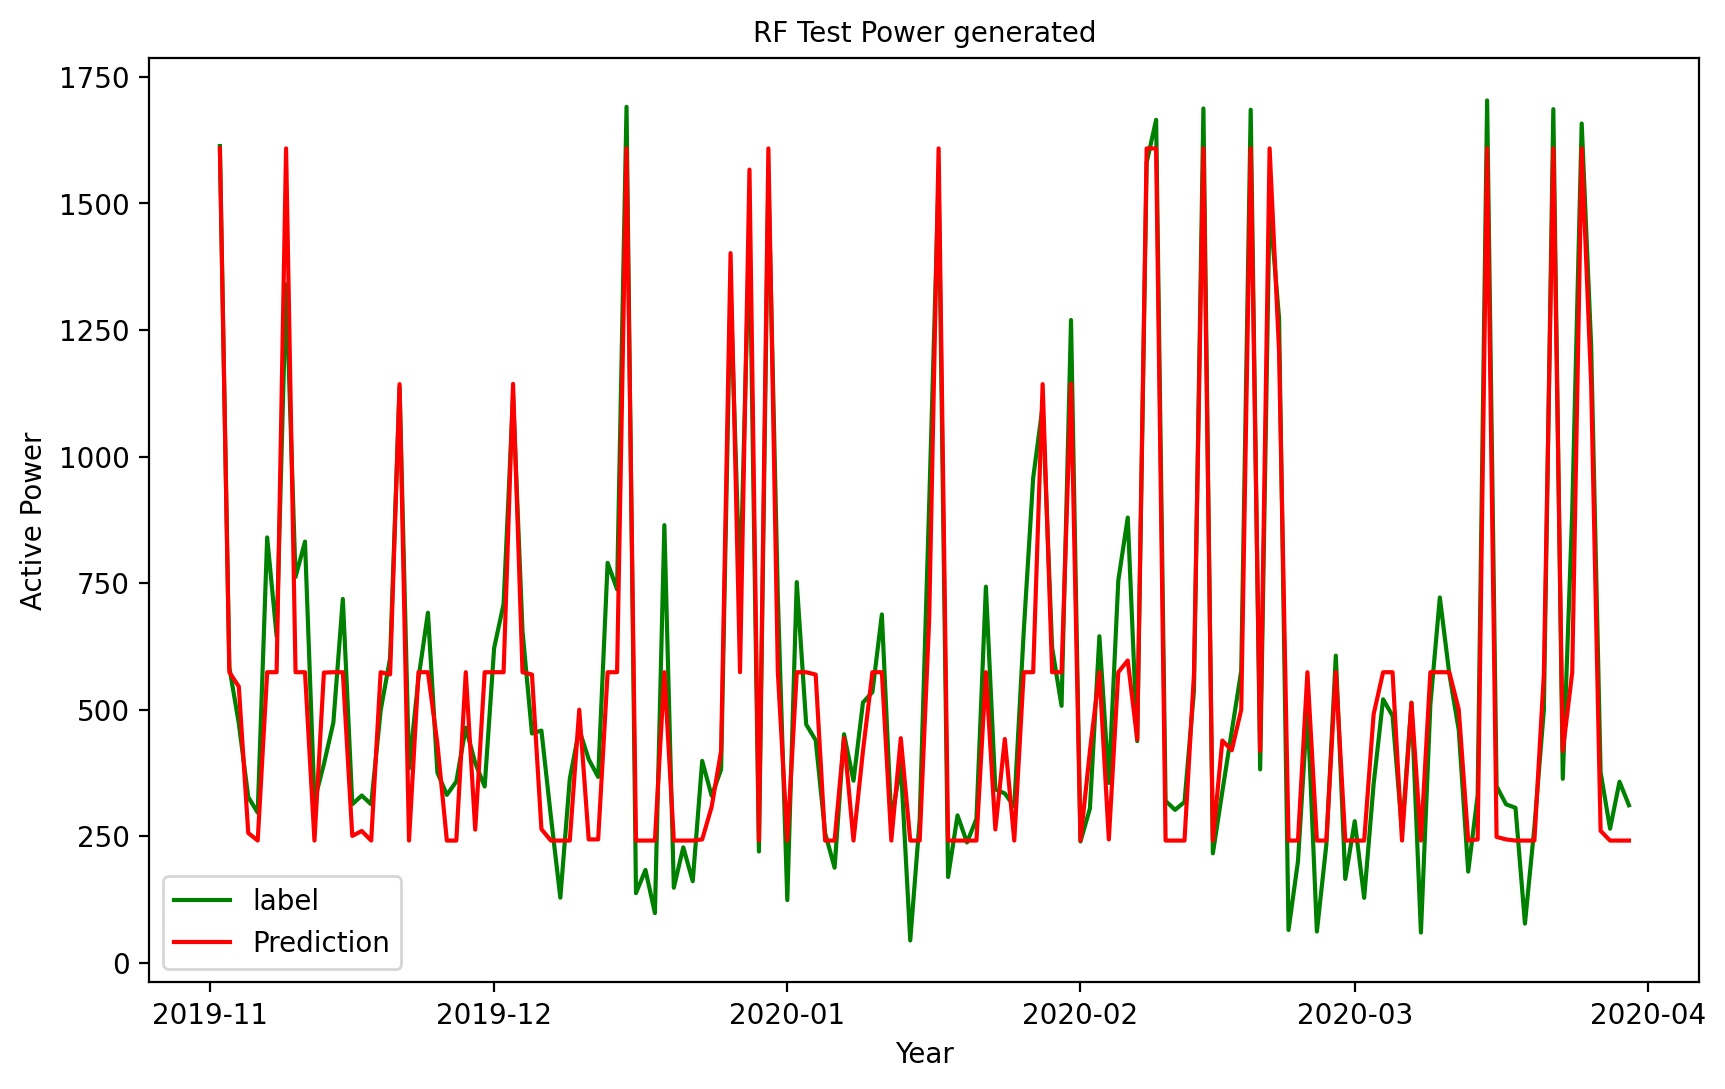

In [ ]:
# Create a DataFrame
df_final1 = pd.DataFrame(data={'Actuals':test_y, 'Predictions':prediction2}, index = y_data[600:].index)
df_final1.head()
# Plot the Actual and the Predicted praghs
print('****************************************')
plt.figure(figsize=(10,6))
plt.plot(df_final1['Actuals'], label = 'label', color ='green')
plt.plot(df_final1['Predictions'], label='Prediction', color = 'red')
plt.ylabel('Active Power')
plt.xlabel('Year')
plt.title('RF Test Power generated', fontsize = 10)
plt.legend()
plt.show()

## 7.4. Performance Metrix

In [ ]:
# 1. Lower MSE: A lower MSE indicates that the model’s predictions are closer to the actual values.
mse = mean_squared_error(df_final1['Predictions'], df_final1['Actuals'])
# 2. Mean Absolute Percentage Error (MAPE): Lower MAPE indicates a better fit for the model.
LR_MAPE = mean_absolute_percentage_error(df_final1['Predictions'].squeeze(), df_final1['Actuals'].squeeze())
# 3. Calculate R²: A higher R² indicates a better fit for the model.
LR_R2 = r2_score(df_final1['Actuals'].squeeze(), df_final1['Predictions'].squeeze())
# Display the performance
print(f"The Mean Squared Error (MSE) is: {mse.item():.2f}")
print(f"Mean Absolute Percentage Error MAPE: {LR_MAPE:.2f}%")
print(f"R² (Coefficient of Determination): {LR_R2:.4f}")

The Mean Squared Error (MSE) is: 13460.19
Mean Absolute Percentage Error MAPE: 0.24%
R² (Coefficient of Determination): 0.9230


## Observation of the performance
From the first permance metrics, lower MSE and MAPE indicates that the model’s predictions are closer to the actual values.
MAPE gives good results because the value is MAPE= 0.24% ~ 24%. Meaning it is about `76% accurate`, in other words the predicted values are 76% closer to the actuals.

Similarly, if we look at the comparitive graph of power generated, it does makes sense, because the label and the predicted values are very close.
And this confirmed by the Coefficient of Determination `0.9230`, ie 92.30%, which is very high close to 1, i.e 100%.

The MSE, on the other hand, gives a big error (MSE)= 13460.19, when compared the predicted and actual values. Which is not very good based on the definition.

But all overall, the model generalizes very well as the predicted graph follows the trend.

## **8. Part 2 of RF**
The second part we consider two featues: Wind Speed and Active Power.
We are using 80% of the dataset for training to predict the 20% of the dataset.
Here we consider the WindSpeed as input and Active Power as the Target

## 8.1 Preparing the data

In [ ]:
# Input
data_2 = df_daily[['WindSpeed', 'ActivePower']]
# X input as Wind Speed and Y Target input as Active Apower
x_data = data_2['WindSpeed']
y_data = data_2['ActivePower']
## Reshape the data
xdata = x_data.values.reshape(-1,1)
ydata = y_data.values.reshape(-1)
xdata.shape, ydata.shape

((750, 1), (750,))

##8.2. Train, Test and Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
# We are using 80% of the dataset for training to predict the 14 days after that
# Split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(xdata, ydata, test_size=0.20, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((600, 1), (150, 1), (600,), (150,))

## 8.3. Define the Random Forest Model

In [ ]:
## RandomForest Regressor Model
rf_regr = RandomForestRegressor(n_estimators=1000 ,max_depth=2, random_state=42)
# Fit the X, y Data
rf_regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=42)

## 8.4. Making Prediction

In [ ]:
# Make predictions on the train set
y__predict = rf_regr.predict(train_X)
# Make predictions on the test set
prediction2 = rf_regr.predict(test_X)
# Create a DataFrame
df_final2 = pd.DataFrame(data={'Actual  data':train_y, 'Predicted data':y__predict}, index = y_data[150:].index)
df_final2.head()

Actual  data  Predicted data
2018-07-20 00:00:00+00:00    344.250999      443.605815
2018-07-21 00:00:00+00:00    614.322243      573.921685
2018-07-22 00:00:00+00:00    769.370278      573.921685
2018-07-30 00:00:00+00:00    504.113307      418.430021
2018-07-31 00:00:00+00:00    355.260900      241.361182

##8.5. Plot the graphs

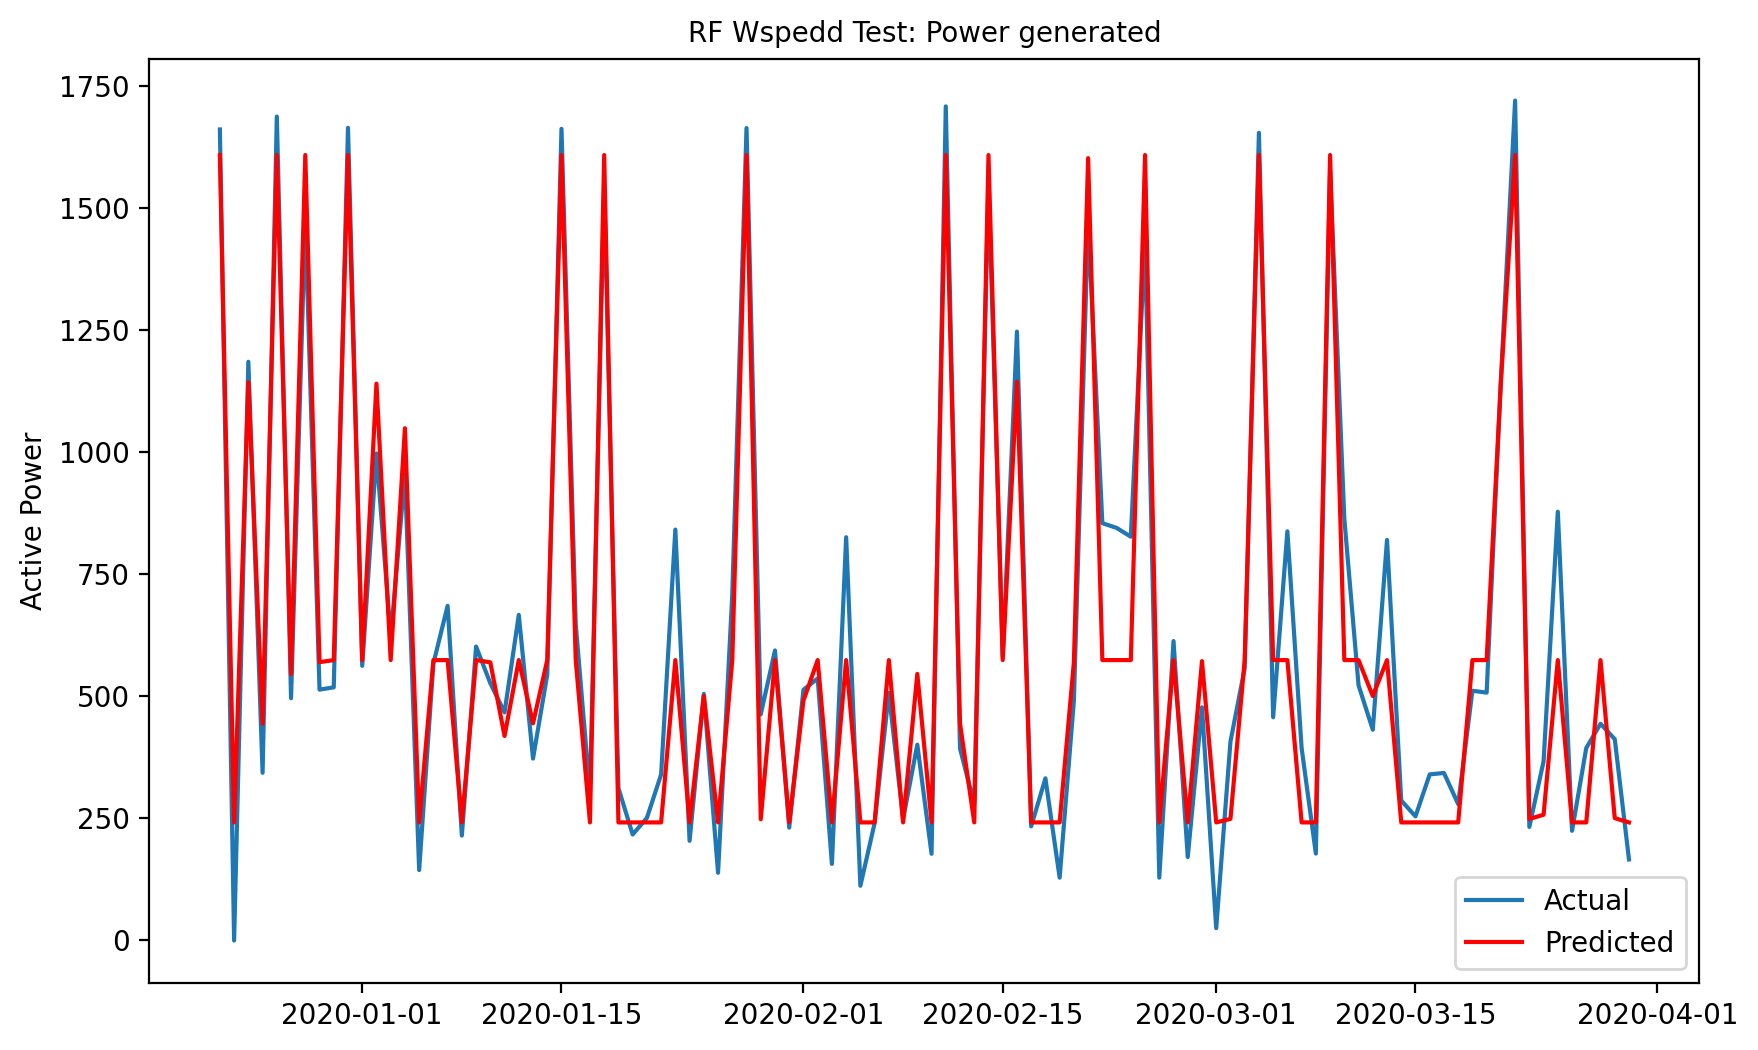

In [ ]:
## Plot
plt.figure(figsize=(10,6))
plt.plot(df_final2['Actual  data'][500:], label='Actual')
plt.plot(df_final2['Predicted data'][500:], label='Predicted', color='red')
plt.ylabel('Active Power')
plt.title('RF Wspedd Test: Power generated', fontsize = 10)
plt.legend()
plt.show()

## 8.6. Evaluate the Model: Performance Metrix RF 2

In [ ]:
# 1. Lower MSE: A lower MSE indicates that the model’s predictions are closer to the actual values.
mse_rf = mean_squared_error(df_final2['Actual  data'], df_final2['Predicted data'])
# 2. Mean Absolute Percentage Error (MAPE): Lower MAPE indicates a better fit for the model.
LR_MAPE_rf = mean_absolute_percentage_error(df_final2['Predicted data'].squeeze(), df_final2['Actual  data'].squeeze())
# 3. Calculate R²: A higher R² indicates a better fit for the model.
LR_R2_rf = r2_score(df_final2['Predicted data'].squeeze(), df_final2['Actual  data'].squeeze())
# Display the performance
print(f"The Mean Squared Error (MSE) is: {mse_rf.item():.2f}")
print(f"Mean Absolute Percentage Error MAPE: {LR_MAPE_rf:.2f}%")
print(f"R² (Coefficient of Determination): {LR_R2_rf:.4f}")

The Mean Squared Error (MSE) is: 12234.20
Mean Absolute Percentage Error MAPE: 0.22%
R² (Coefficient of Determination): 0.9467


## Observation of the performance
From the first permance metrics, lower MSE and MAPE indicates that the model’s predictions are closer to the actual values.
MAPE gives good results because the value is MAPE= 0.24% ~ 24%. Meaning it is about `78% accurate`, in other words the predicted values are 76% closer to the actuals.

Similarly, if we look at the comparitive graph of power generated, it does makes sense, because the label and the predicted values are very close.
And this confirmed by the Coefficient of Determination `0.9467`, ie 94.67%, which is very high close to 1, i.e 100%.

The MSE, on the other hand, gives a big error (MSE)= 12234.20 when compared the predicted and actual values. Which is not very good based on the definition.

But all overall, the model generalizes very well as the predicted graph follows the trend.

# 9. Conclusion
I managed to model and implement LSTM and Random Forest.
LSTM perform well when using the Active Power only as input as well as in the second part when Wind speed is used as inputs and Active power as a target input.

From the first permance metrics,
MAPE gives good results because the value is MAPE1 = 0.39% and MAPE2= 0.37%. Meaning it is about `61% and 63% accurate`,
However, the MSE gives a big error when compared the predicted and actual values. Which is not very good based on the definition.
However, looking at the comparitive graph of power generated, it does makes sense, because the label and the predicted values are not very close.
And this is confirmed by the Coefficient of Determination `0.3053 and 0.3653` meaning about 30.53% and 36.5% Accuracy, which are pretty low.

Random forest surprisingly does perform well when using the Active Power only as input as well as when Wind speed inputs and Active power as a target input. Thus it is confirmed by looking at the graph and also the performance metrics. Both part 1 and 2 performed at 72%, and 76% MAPE Accuracy and the Coefficient of Determination at 92% and 94% Accuracy.
However, the MSE does not perform well, too big errors. Maybe different parameters should be investigated.

But all overall, the model generalizes very well as the predicted graph follows the trend.

Challenges with matrices, on how to flip them, how they are transformed into Tensor for LSTM and their corresponding shape to be trained.
Changing the Number of hidden dimensions can also affect significantly the results like in the case of Wind Speed variable, Number of iterations, sometimes need to be in creased.


``Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook.
Do check the Dataset as well and explore it in your own style!
Happy Learning!``

In [ ]:
print('-----------------***********************************E...N...D***********************************----------------------BREAK')

-----------------***********************************E...N...D***********************************----------------------BREAK
